# Introduction

In this notebook, I will be carrying out Exploratory Data Analysis to uncover relationships and properties within the datasets to guide modelling decisions and make inferences.

# Content

1. [Module Dictionary](#Module-Dictionary)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [End of Notebook](#End-of-Notebook)

Feel free to click on the following notebooks to 'fast forward' to other sections of this project.

|Notebook Title|Description|
|---|---|
|[Introduction & Data Cleaning](01_Intro_Data_Cleaning.ipynb)|This notebook contains the introduction of the project, background motivation, problem statement and the inspection and cleaning of data.|
|[EDA](02_EDA.ipynb)|This notebook contains details on Exploratory Data Analysis.|
|[Modelling](03_Modelling.ipynb)|This notebook contains details on Modelling the data from a time series perspective.|
|[Modelling 2](04_Modelling2.ipynb)|This notebook contains details on time series Modelling with ARIMA, SARIMA and SARIMAX.|
|[Evaluation & Conclusion](05_Eval_Concl.ipynb)|This notebook contains details on model selection, evaluation and conclusion to the project|

# Module Dictionary

Here is a summary of the functions and a brief description of what they do which I may call upon from zul_modules.

|Name|Brief Description|
|---|---|
|distributions_correlations(df)|Plots basic EDA charts to study distributions and correlations|
|lineplots_for_features(df)|Lineplot subplots for all features of a dataframe|
|plot_all_features(df)|Plot all features of a dataframe in same chart|
|df_loop(df, alpha)|Loop through features of a dataframe and apply Augmented Dickey Fuller Test with alpha specified|
|plot_acf_for_features(df, dataframe_name, lags=lags)|Plots ACF for all features of a dataframe|

# Libraries Used

In [1]:
import pandas as pd
import zul_module as zm
from sklearn.metrics import mean_squared_error
import numpy as np

/Users/zulthyllas/mambaforge/envs/dsi-sg/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-09-10 23:02:55.929002: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import

In [2]:
# importing all dataframes of interest as pickle files
features_1960_q = pd.read_pickle('../assets/features_1960_q.pkl')
features_1990_q = pd.read_pickle('../assets/features_1990_q.pkl')
features_1990_m = pd.read_pickle('../assets/features_1990_m.pkl')
all_features_2006_q = pd.read_pickle('../assets/all_features_2006_q.pkl')
all_features_2006_m = pd.read_pickle('../assets/all_features_2006_m.pkl')
gdp_m_q = pd.read_pickle('../assets/gdp_m_q.pkl')
gdp_m_q_uns = pd.read_pickle('../assets/gdp_m_q_uns.pkl')

# Exploratory Data Analysis

There are a few factors here to take note of when carrying out EDA. 

##### Percentage Difference Representation

The datapoints captured for all variables are in percentage differences when compared to its preceding periodic datapoint. Therefore, we can expect the data to be stationary and it would make sense for the data to behave in the following ways:

1. Line plots of features would appear like 'white noise'.
2. Distributions would appear normally distributed.
3. Visual correlations would not be meaningful.
4. Studying Rolling Means would not make sense as data points are differenced.

##### Periodically Arranged Data

As the data is periodically arranged as predicting GDP growth is a time series problem, it would make sense to study its autocorrelation patterns. Further, observations from distributions and correlations would need to have the thinking where the represented relationships may not translate to time series modelling as the distributinos and correlations ignore periods and time while the very essence of modelling time series data would only consider time dependent patterns and not distribution relationships etc. Therefore, while distributions and correlations may have useful insights it may be more applicable for regression models and not so much for time series modelling.

##### Approach

With that said, I will be approaching EDA with the following exploratory steps in mind:

1. Study distirbutions & correlations
2. Line Plot Study
3. Study time dependent patterns such as ACF, PACF, correlations.

## Distributions & Correlations

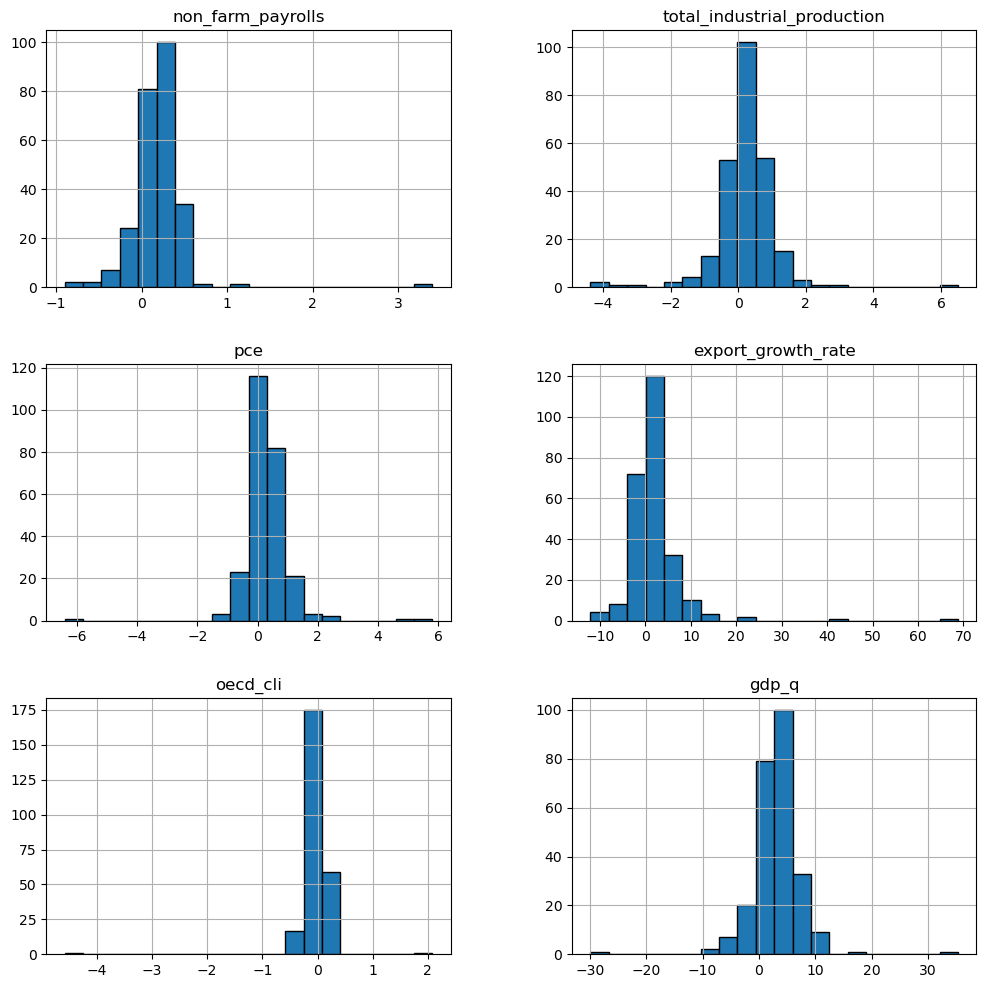

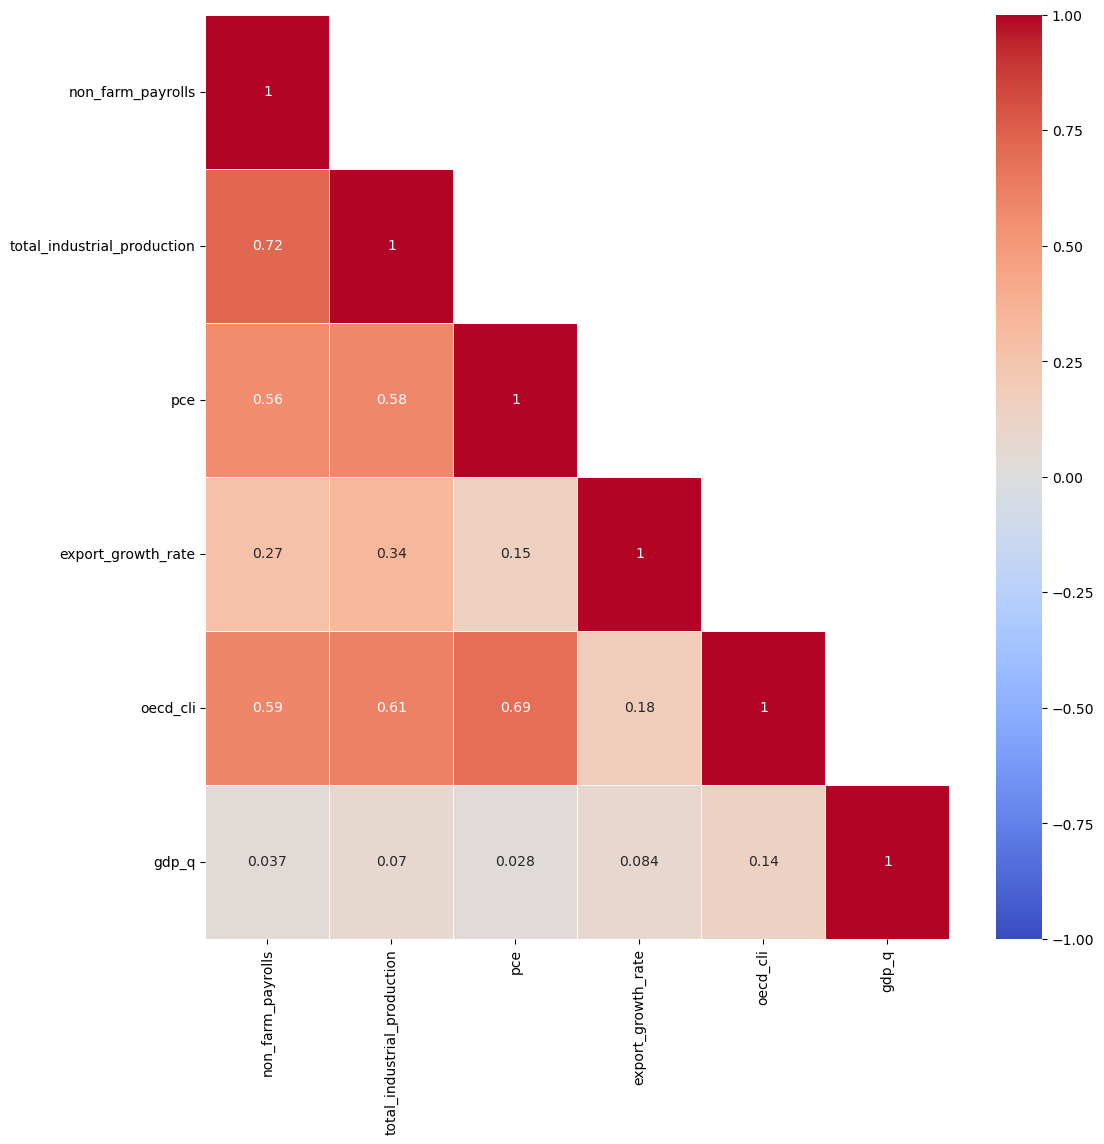

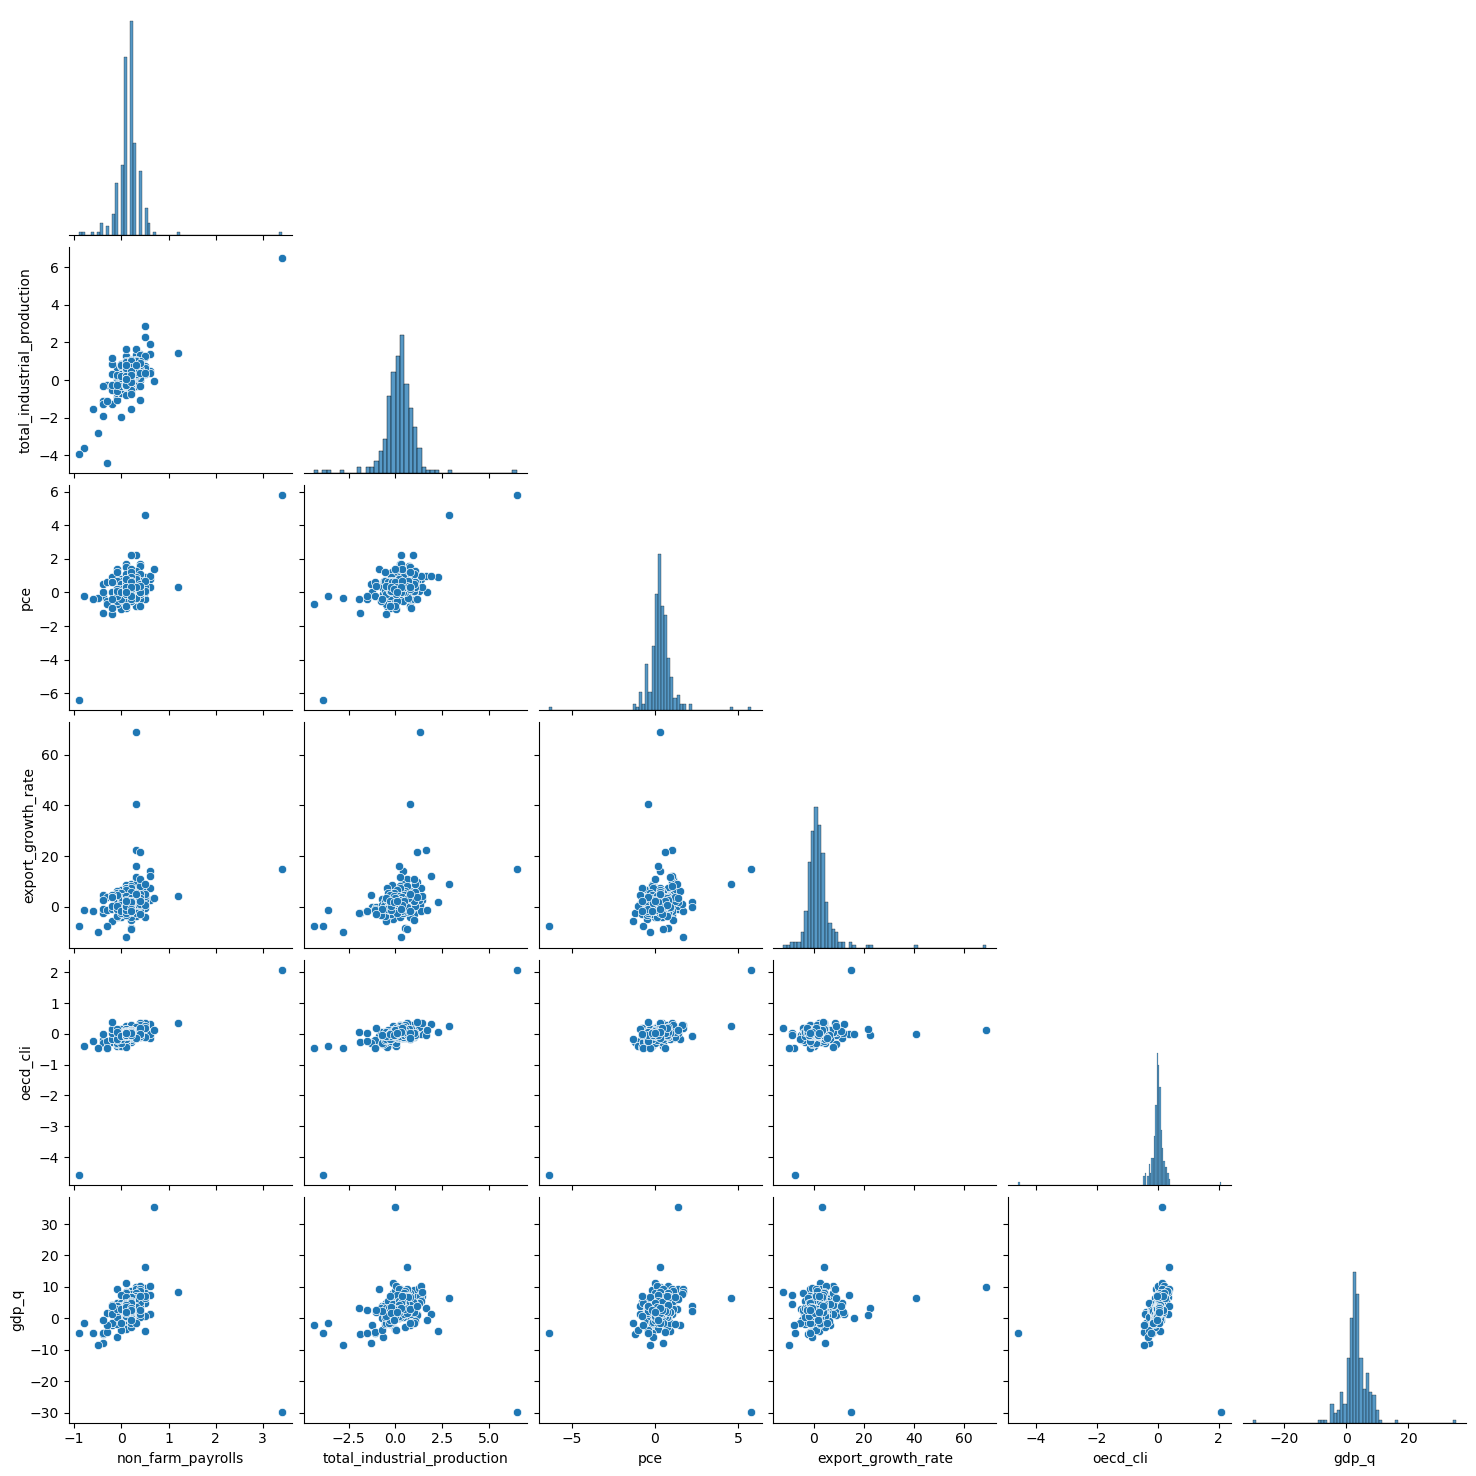

In [3]:
zm.distributions_correlations(features_1960_q)

##### Observations

As mentioned above, I would expect distributions to be normally distributed. I would only mention this here but would expect this to be true for all dataframes I carry out distribution and correlation studies on. 

A second point that I'll mention here which I expect to hold true for all dataframes is about outliers. While it may appear that outliers are present in the distribution charts, these are not erroneous or anomolous data points and are most likely consistent during periods of 'Extreme Economic Events' such as COVID. Further, as we will be using time series models to predict future GDP growth, I am not completely concerned by its presence as I would prioritise time dependent patterns.

We can observe the general pattern where the relationship between GDP and these features are somewhat linear and direct i.e as feature (Xi) increase/decrease, so does GDP.

It is surprising that quarterly GDP is not as correlated to features from the 1960s as I have initially expected. While this is noteworthy, I would be curious to see how ACF and PACF plots behave for me to have a better expectation as to how time series modelling would perform later on.

GDP is a dynamic metric that is made up of many components that influence GDP on a lagging or advanced timeframe. Therefore, it is not uncommon to see that during rare periods, we see interesting correlation data points where a significantly higher non farm payroll print coincided with a large and negative quarterly gdp value. This is true and correct as observed during COVID where an unprecedented government spending and 'easy loans' in the US produced the desired effect of large scale employment of businesses while the real economy was still reeling from decreased consumption as a result of the global economy shutting down. We would observe Real GDP then pick up significantly for the next year or two while hiring rates stabilised on a lower but relatively high level. 

Domain knowledge of historical economic events would be useful when trying to make sense of these 'interesting' data points that would seem erroneous or anomolous on the surface.

From hereon, I would only mention in the observations below other noteworthy points that has not been mentioned here.

##### Other interesting Observations

It is interesting that from the 60s, there was a period where the US had an explosive export growth rate in its history and enjoyed periods of mostly positive growth across all its features.

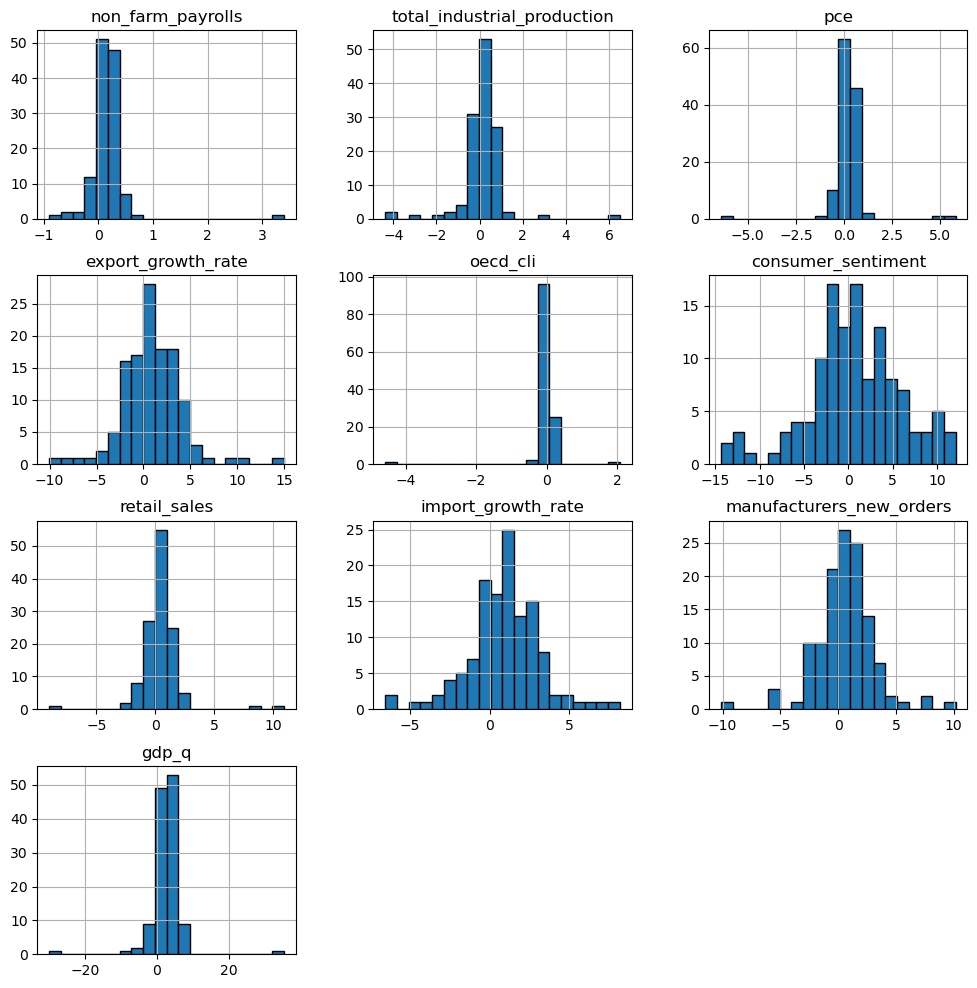

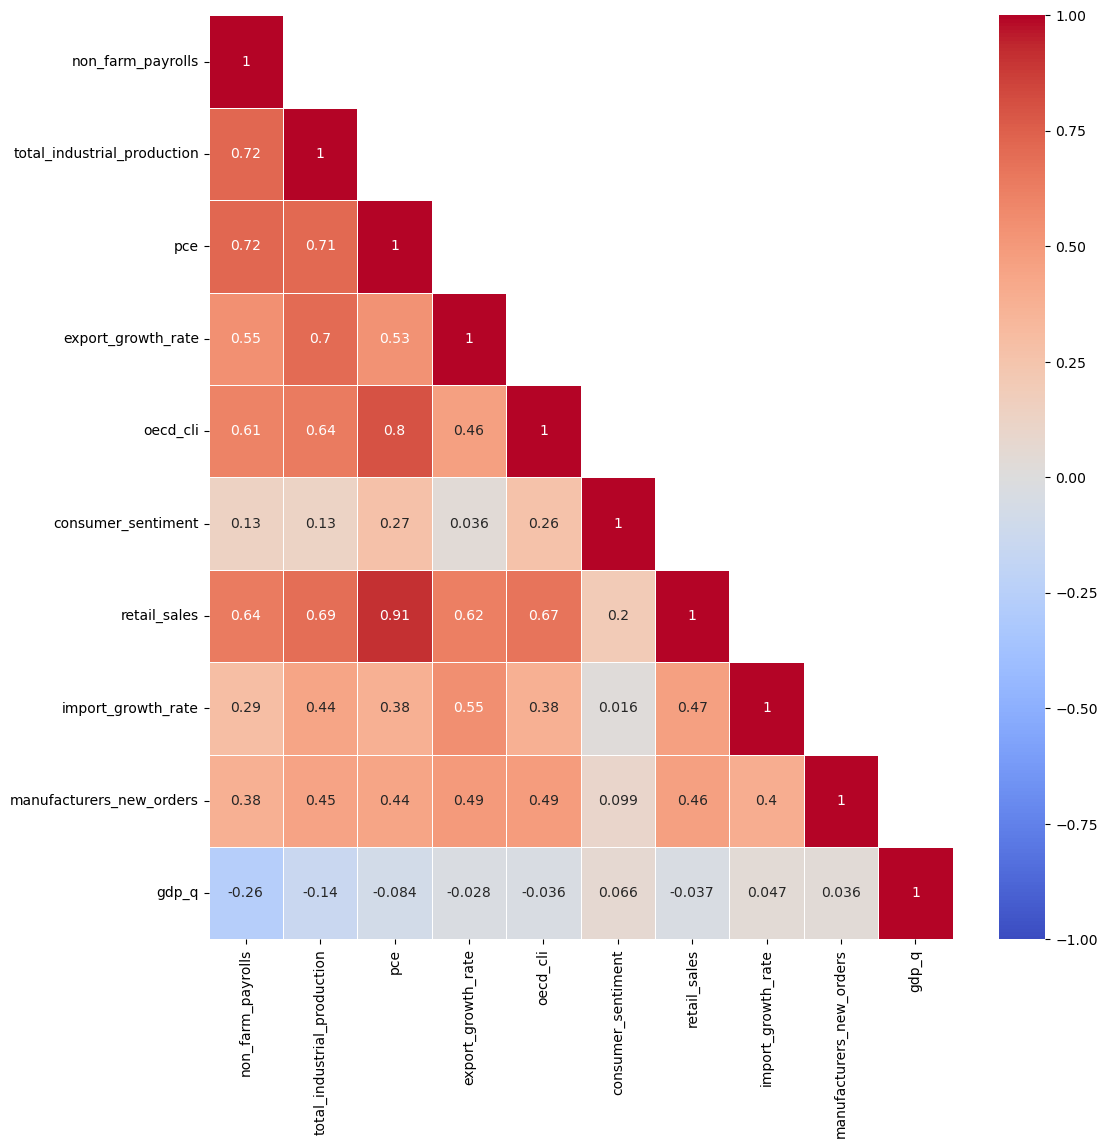

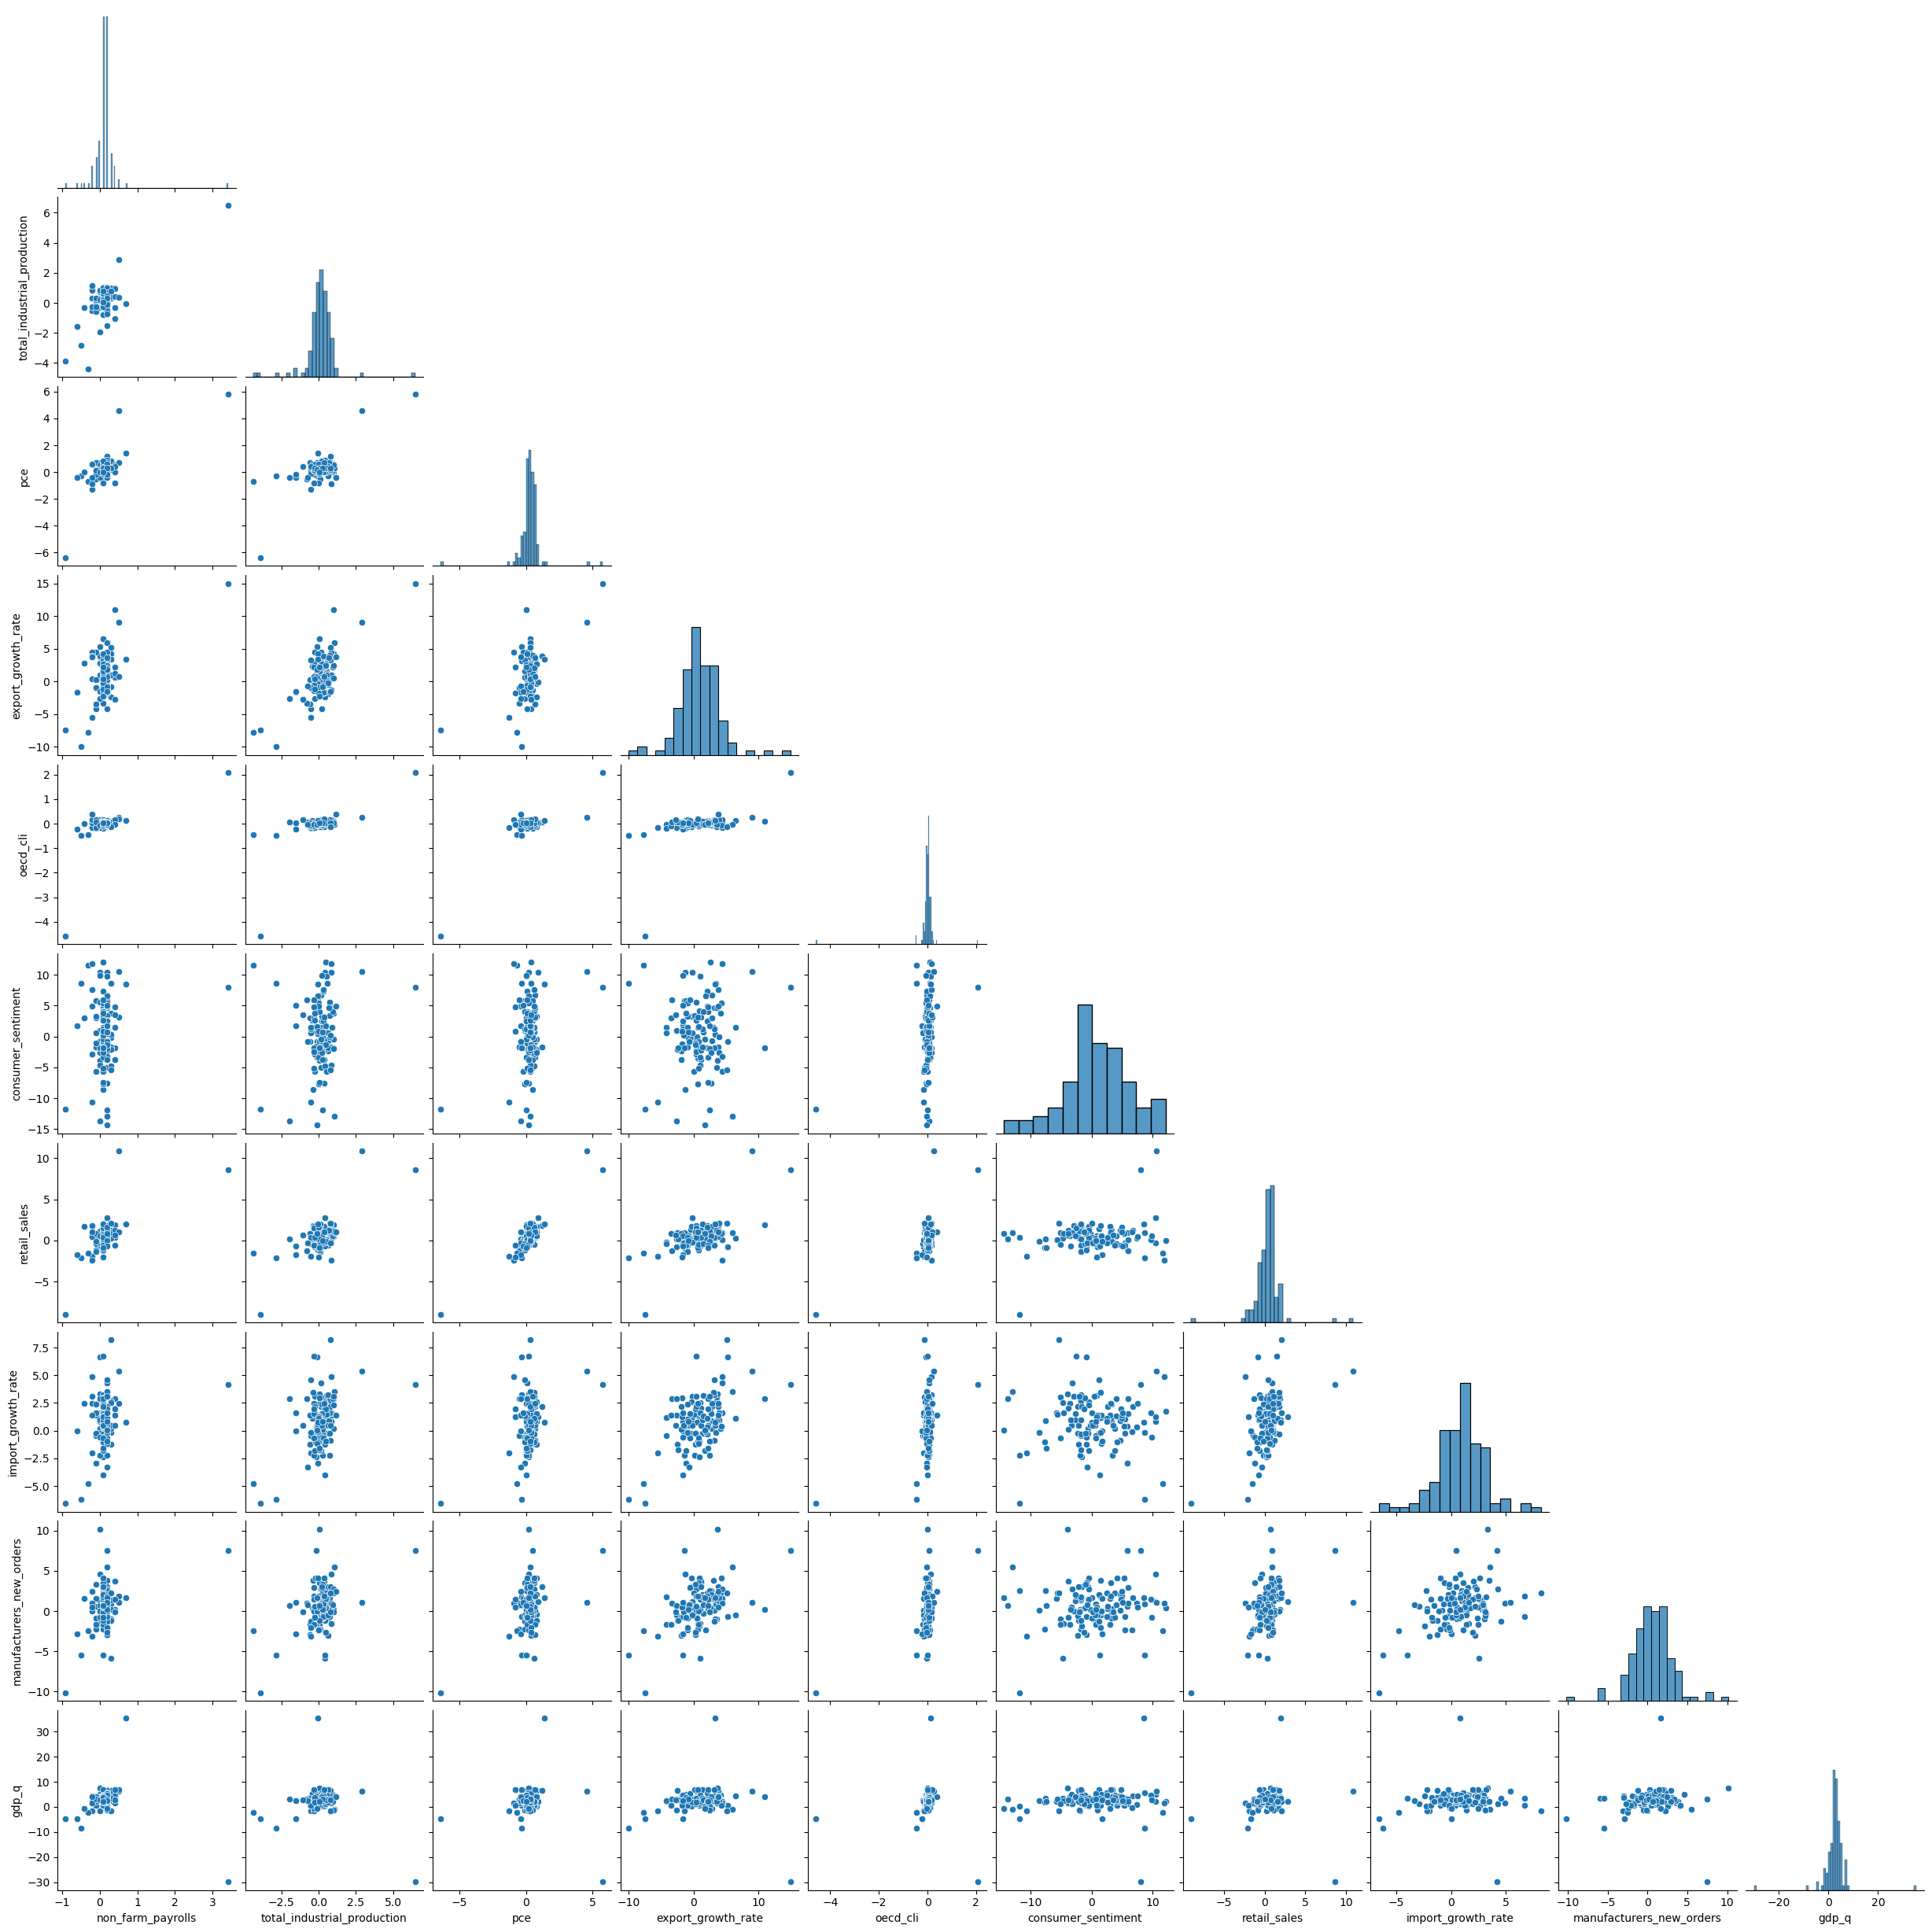

In [4]:
zm.distributions_correlations(features_1990_q)

##### New Observations

A low but not insignificant inverse correlation between quarterly GDP and non farm payrolls is surprising to me and may be due to the fact that the non farm payrolls and GDP are correlated but on a lag.

Some features vary alot more than others e.g Export, import, new orders and consumer sentiment deviating between +10% and -10% relatively more often than other features is noteworthy.

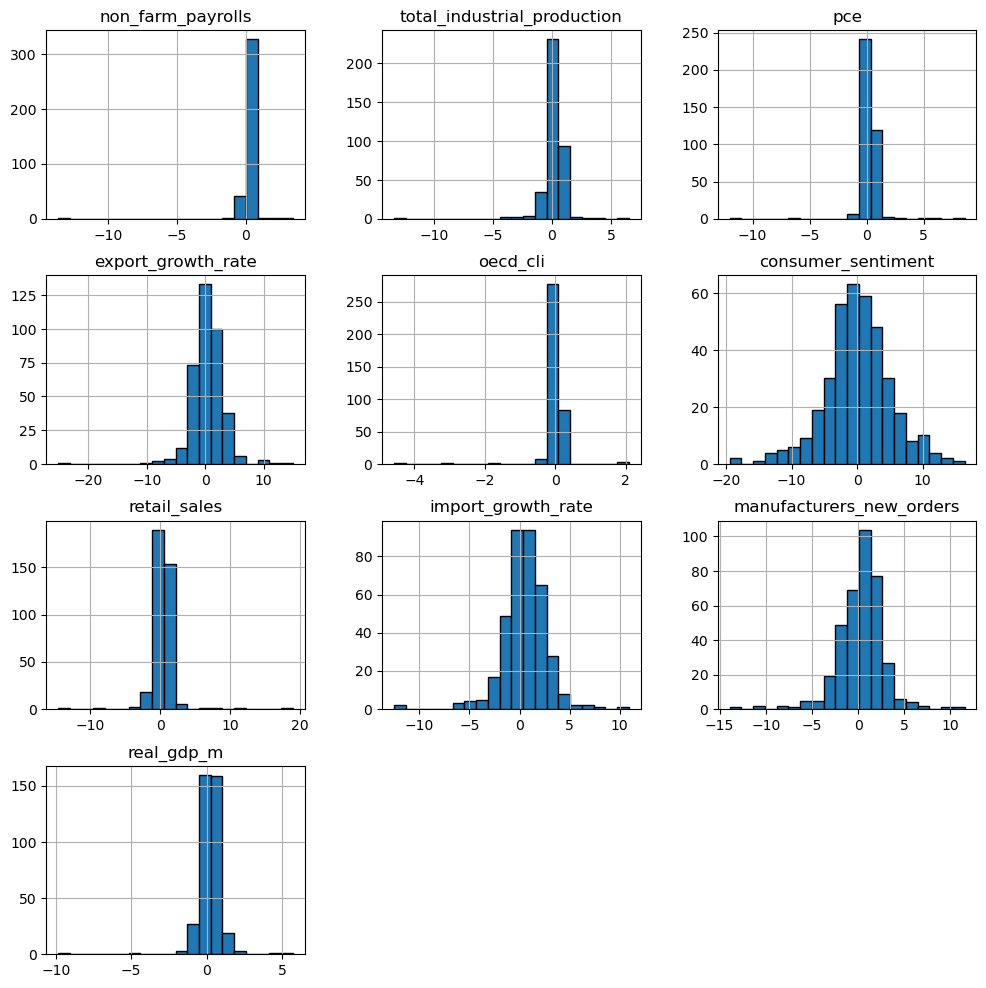

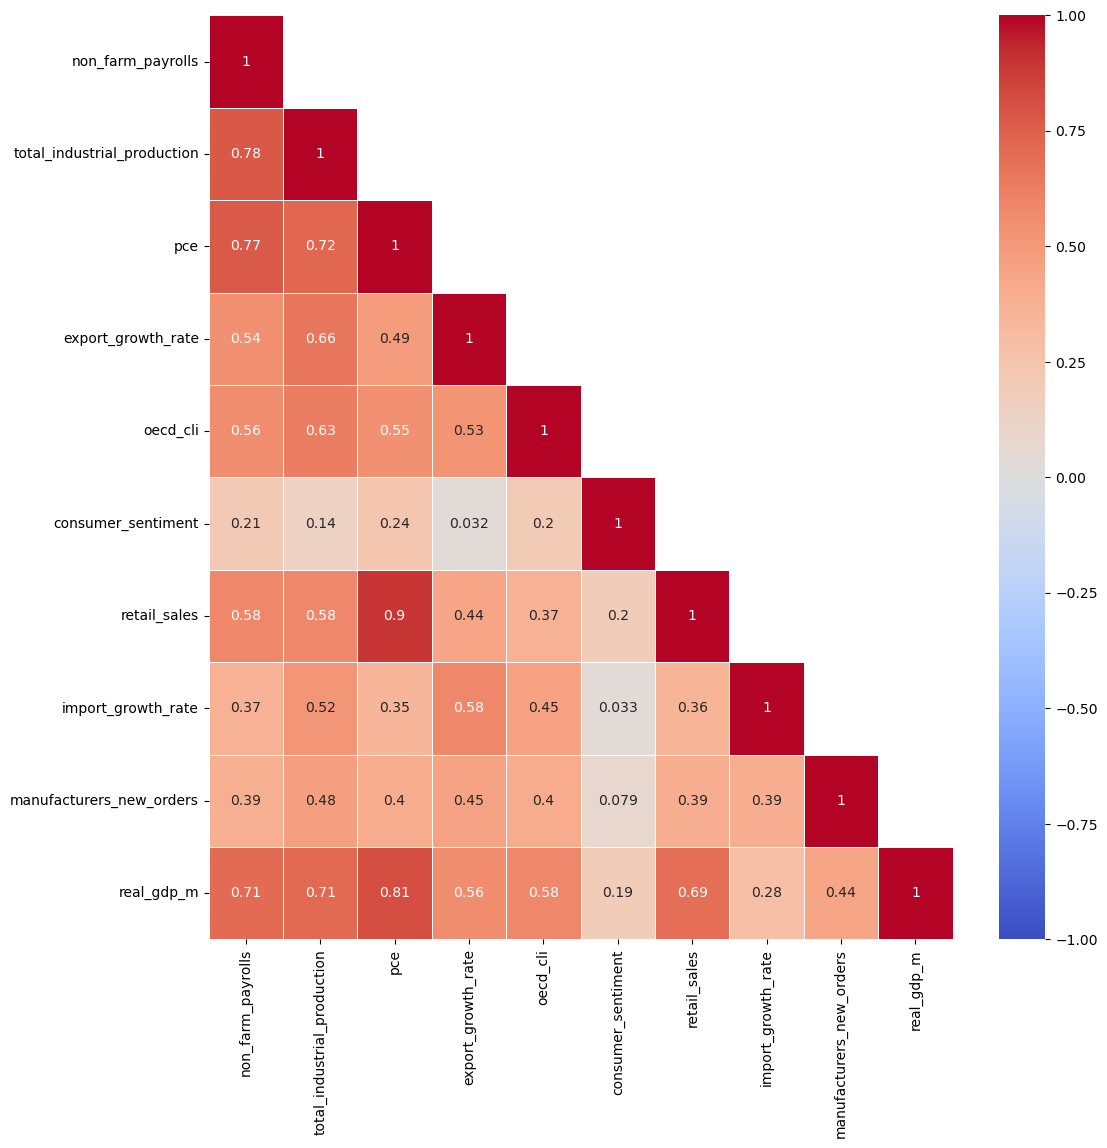

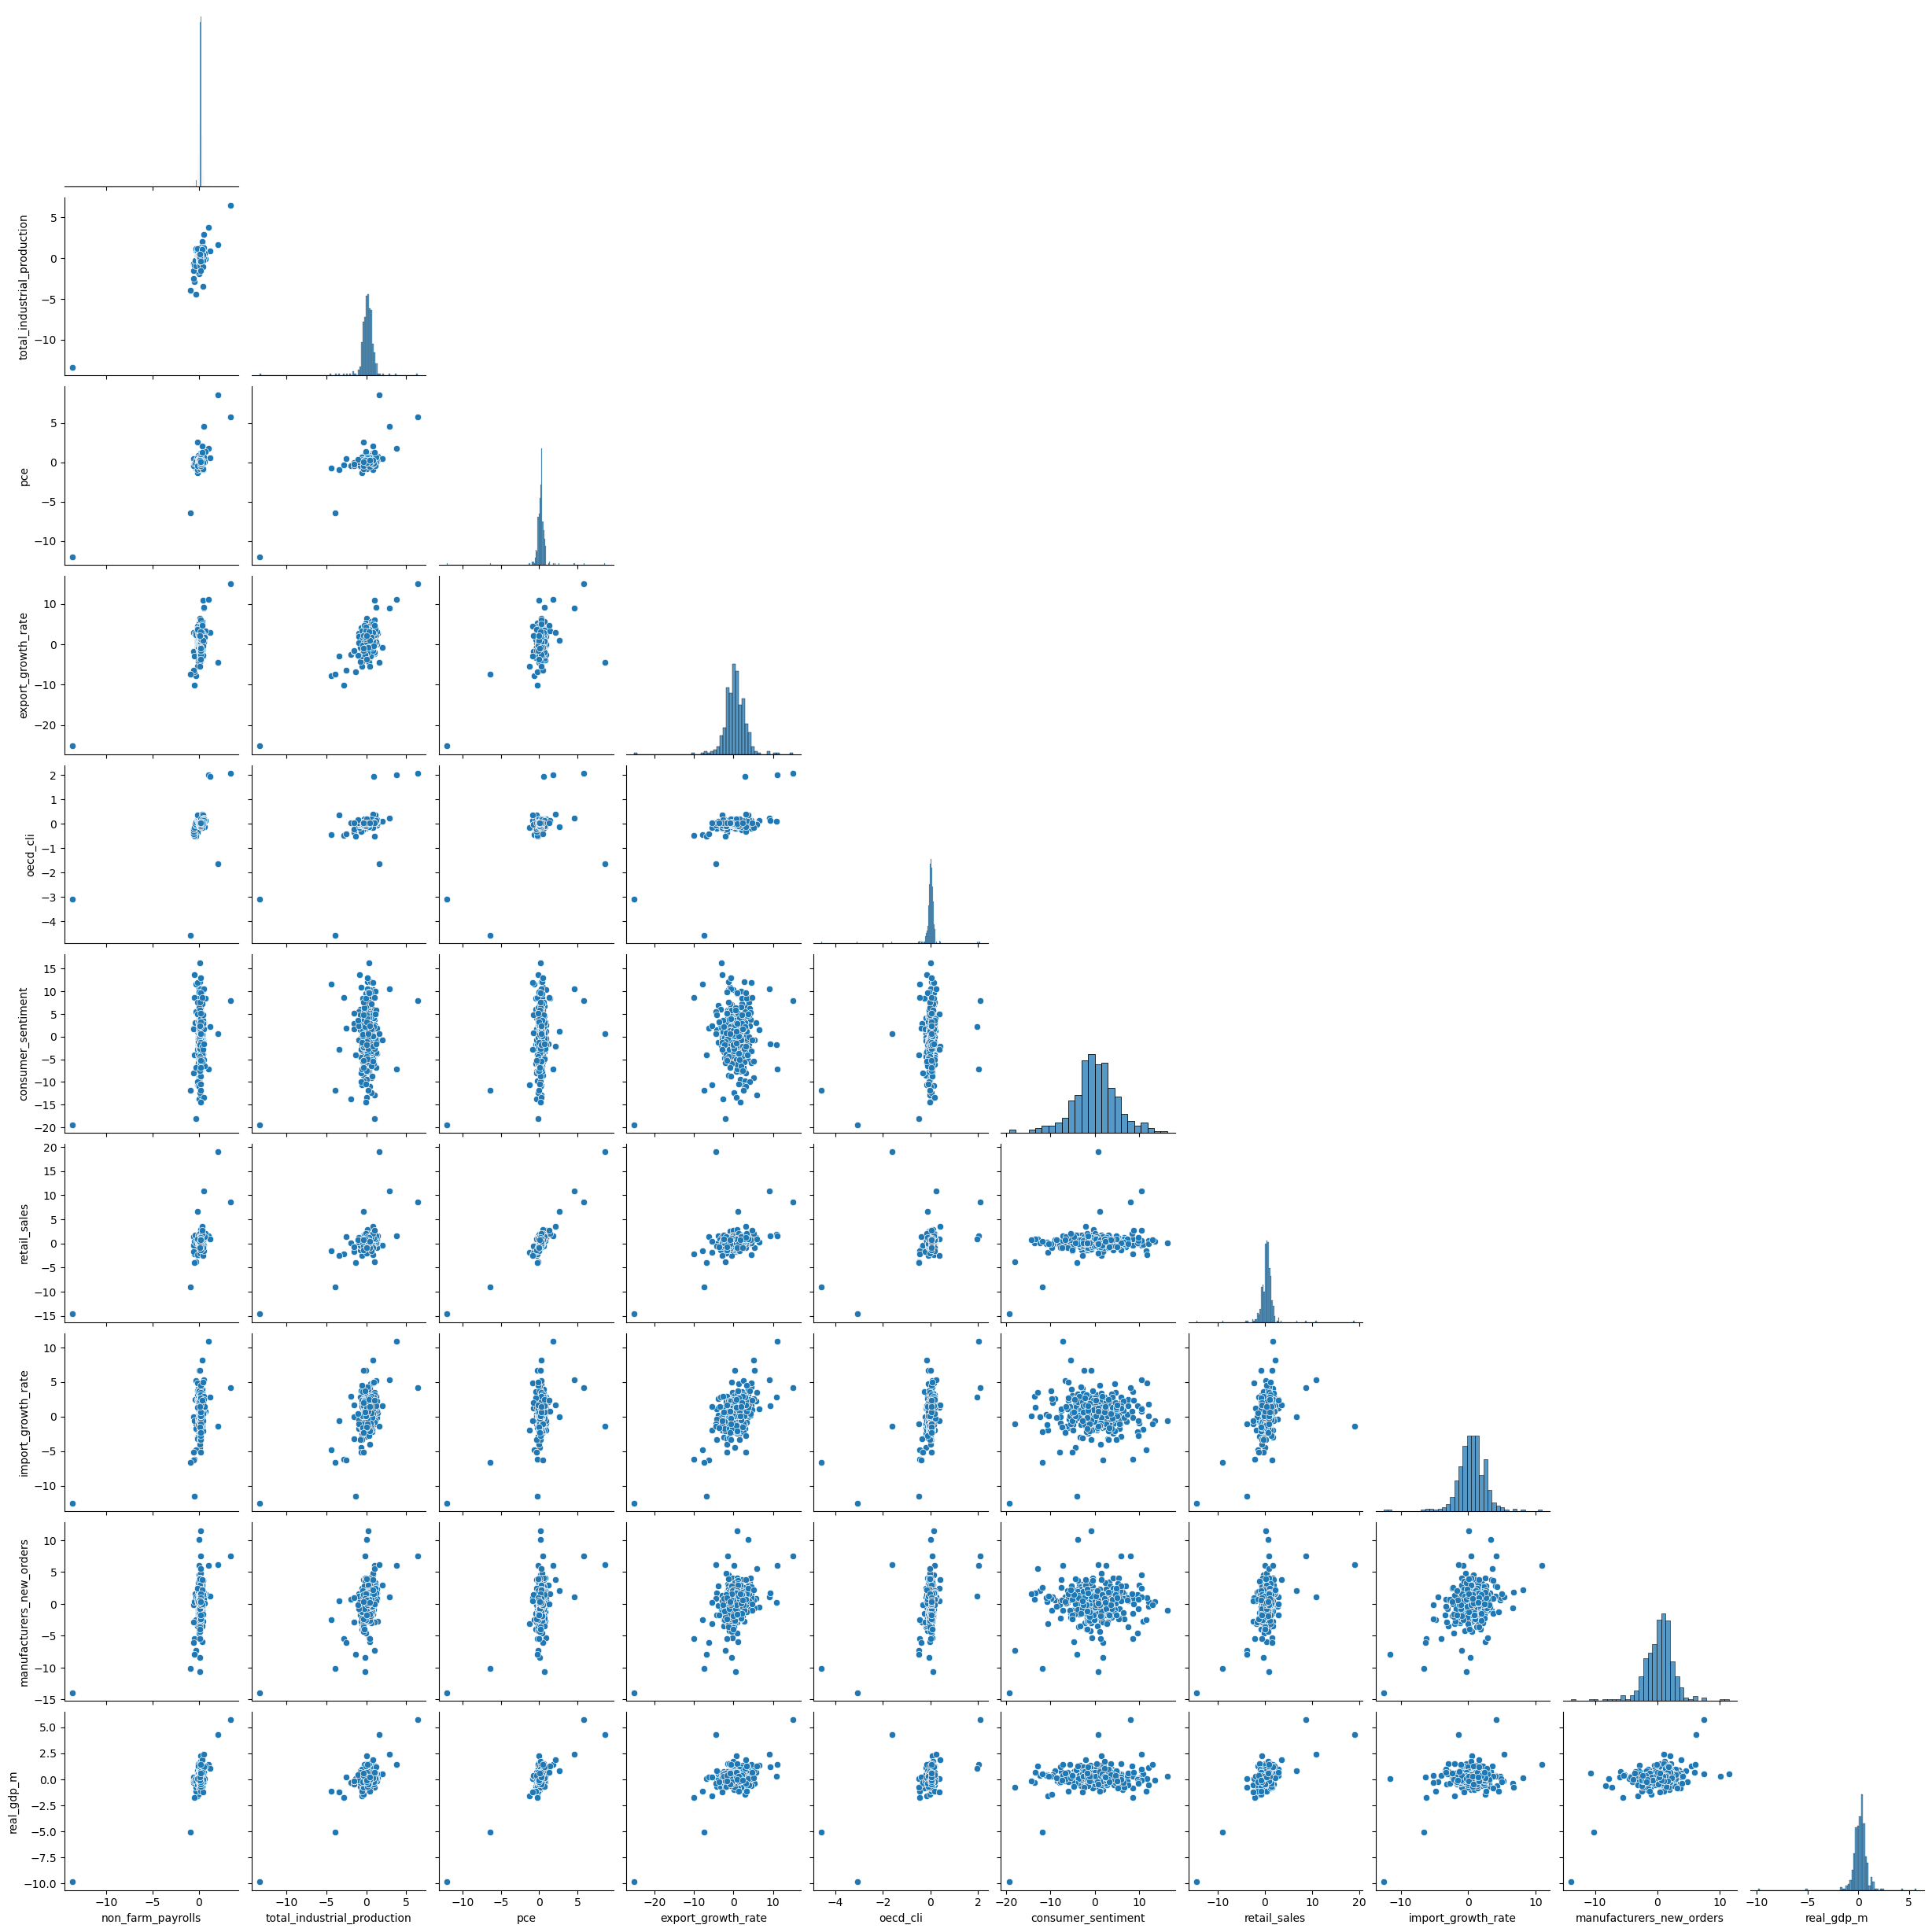

In [5]:
zm.distributions_correlations(features_1990_m)

##### New Observations

It is interesting and defnitely noteworthy that monthly GDP, calculated by S&P exhibits strong and positive relationship with many government released data. This may reveal the fact that S&P takes into account similar features when calculating its GDP proxy index. Further and perhaps a bit disconcertingly is the fact that it does not behave like quarterly GDP, at least from a correlation perspective.

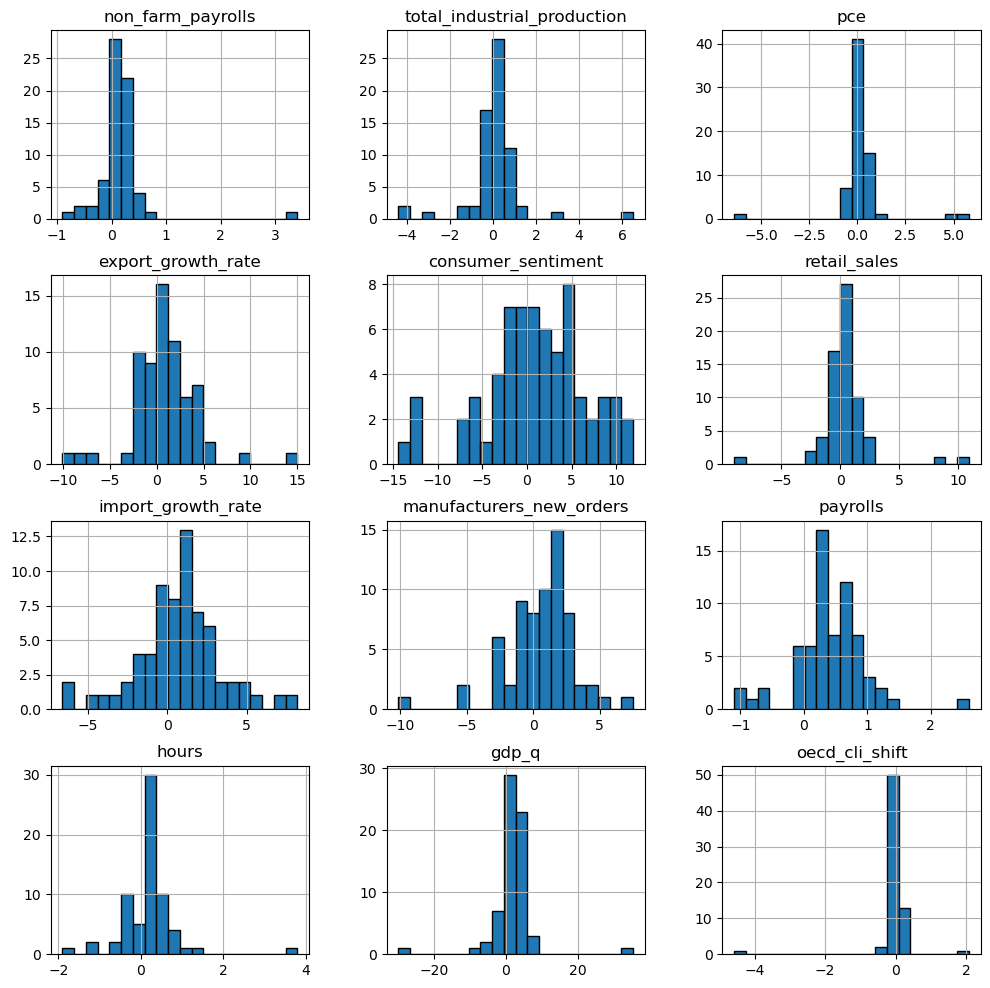

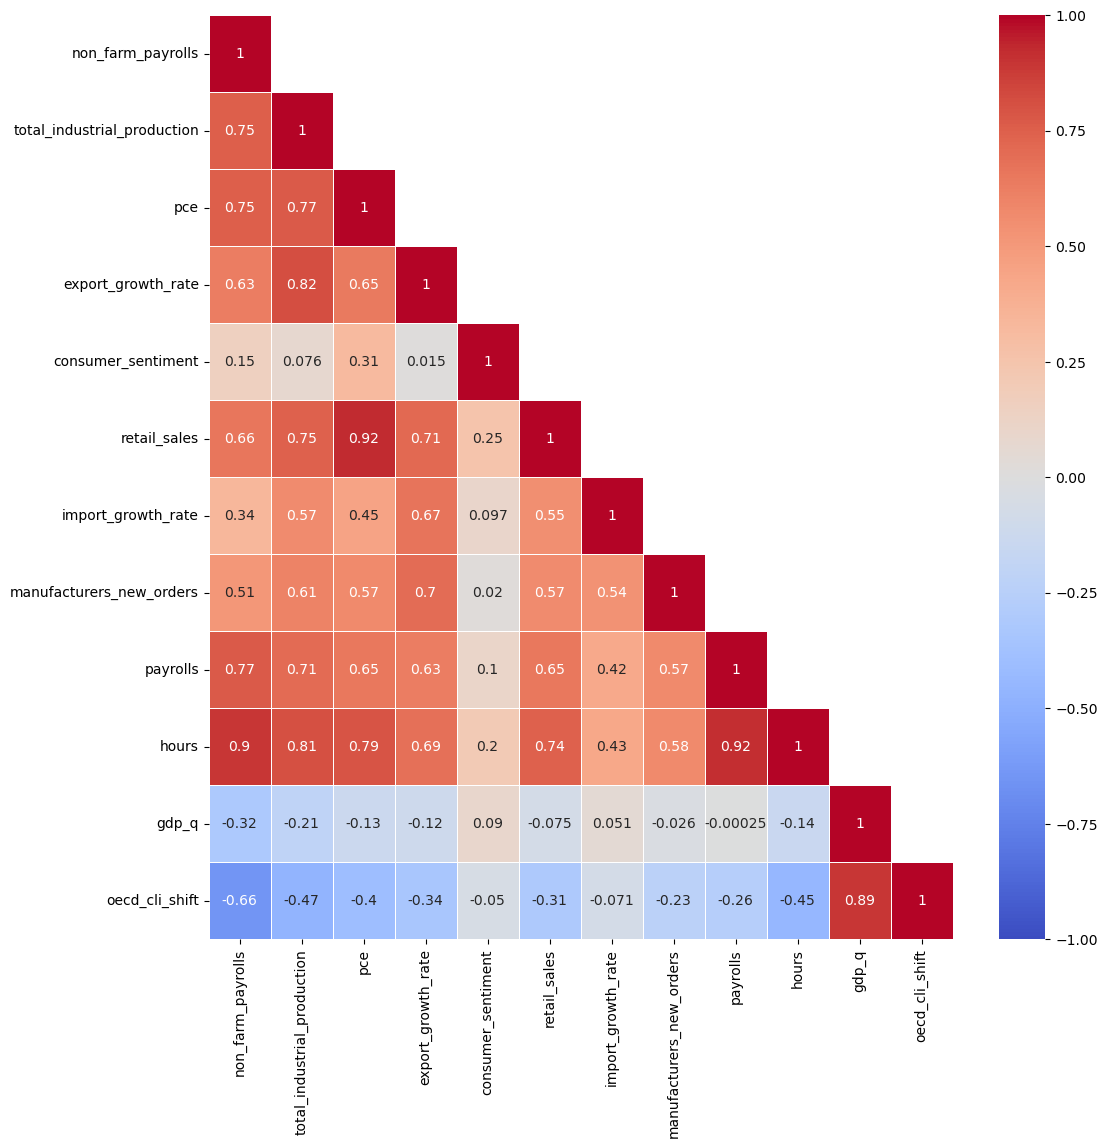

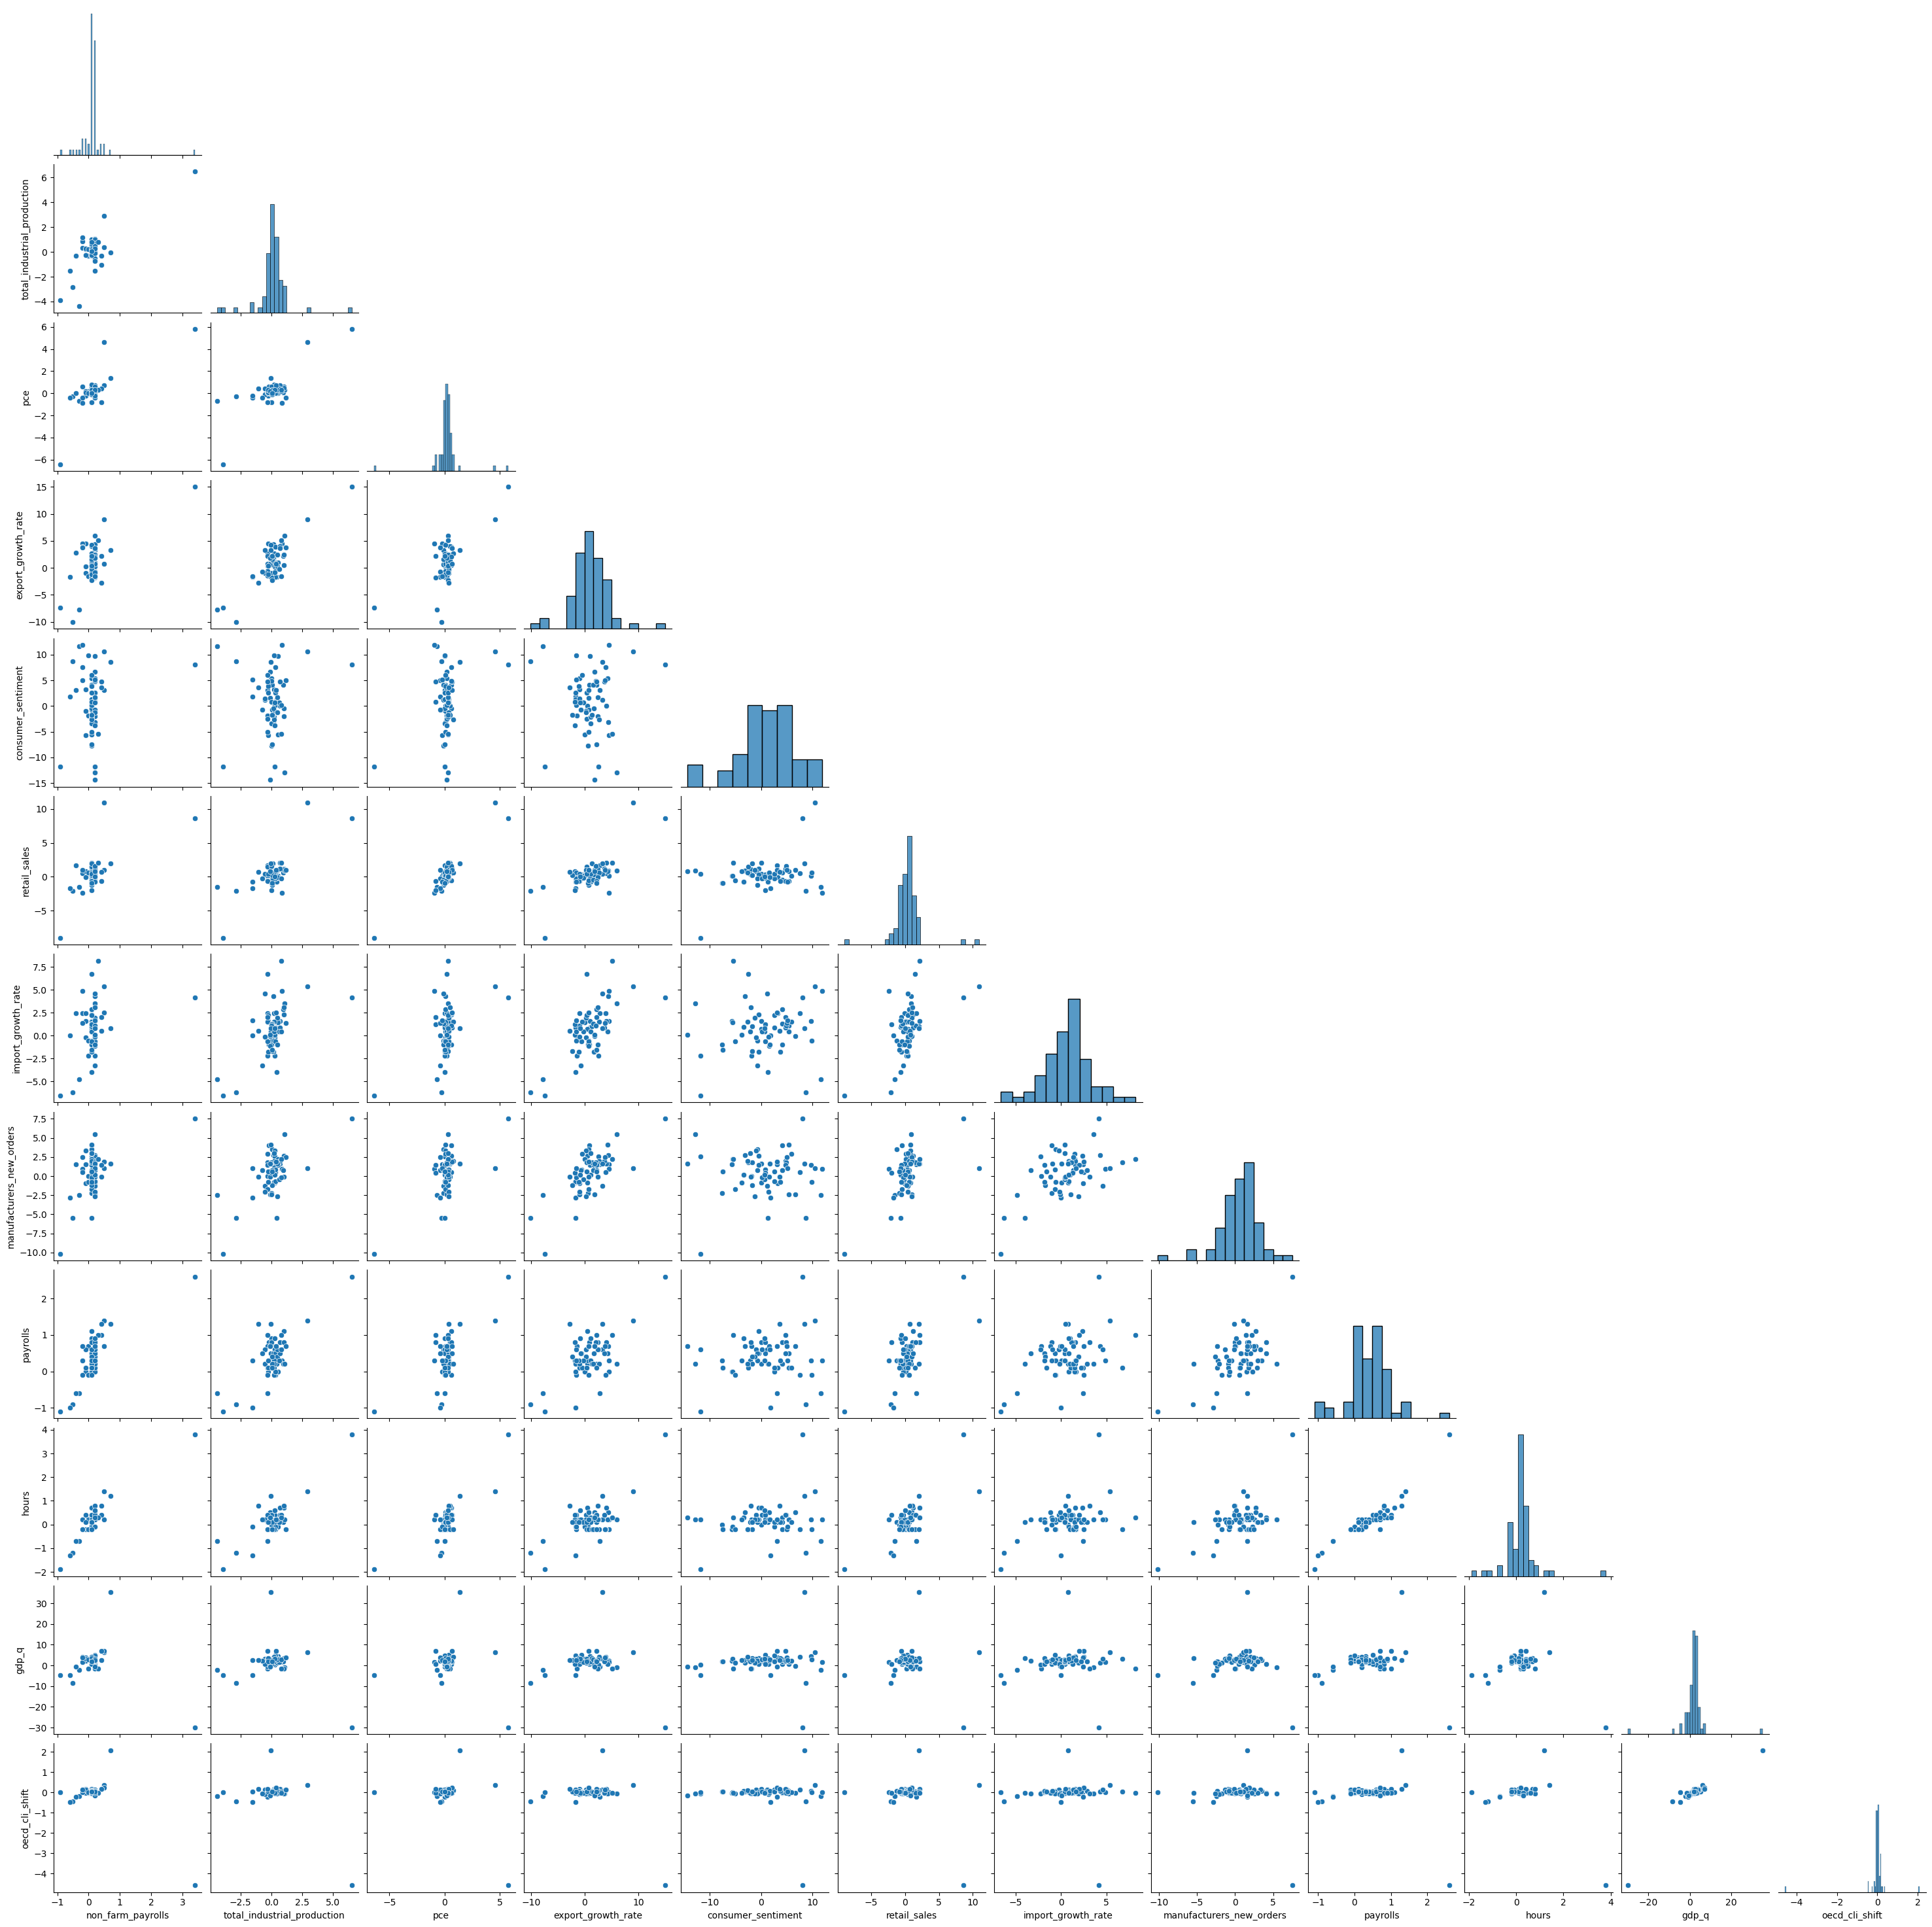

In [6]:
zm.distributions_correlations(all_features_2006_q)

##### New Observations

It is still surprising to me that the inverse correlation between quarterly GDP and non farm payrolls strengthened in recent years when compared to the 1990s to present time.

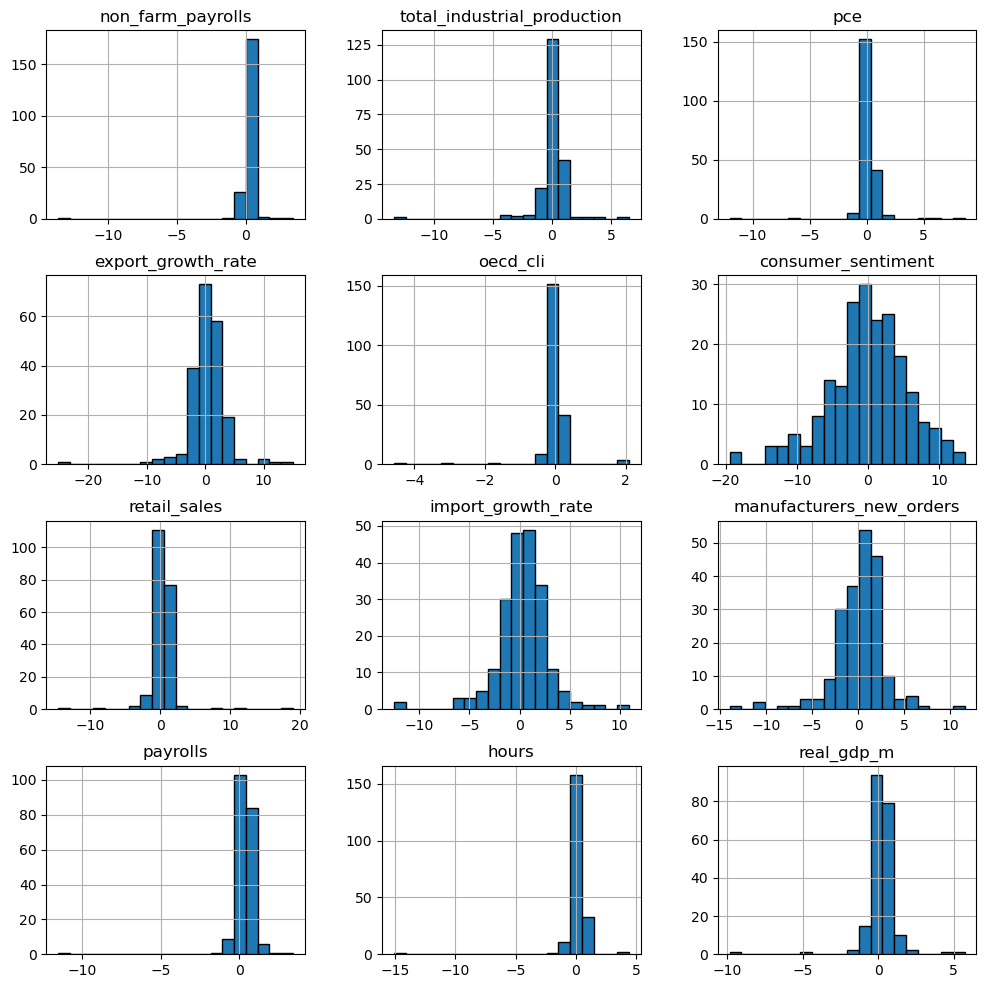

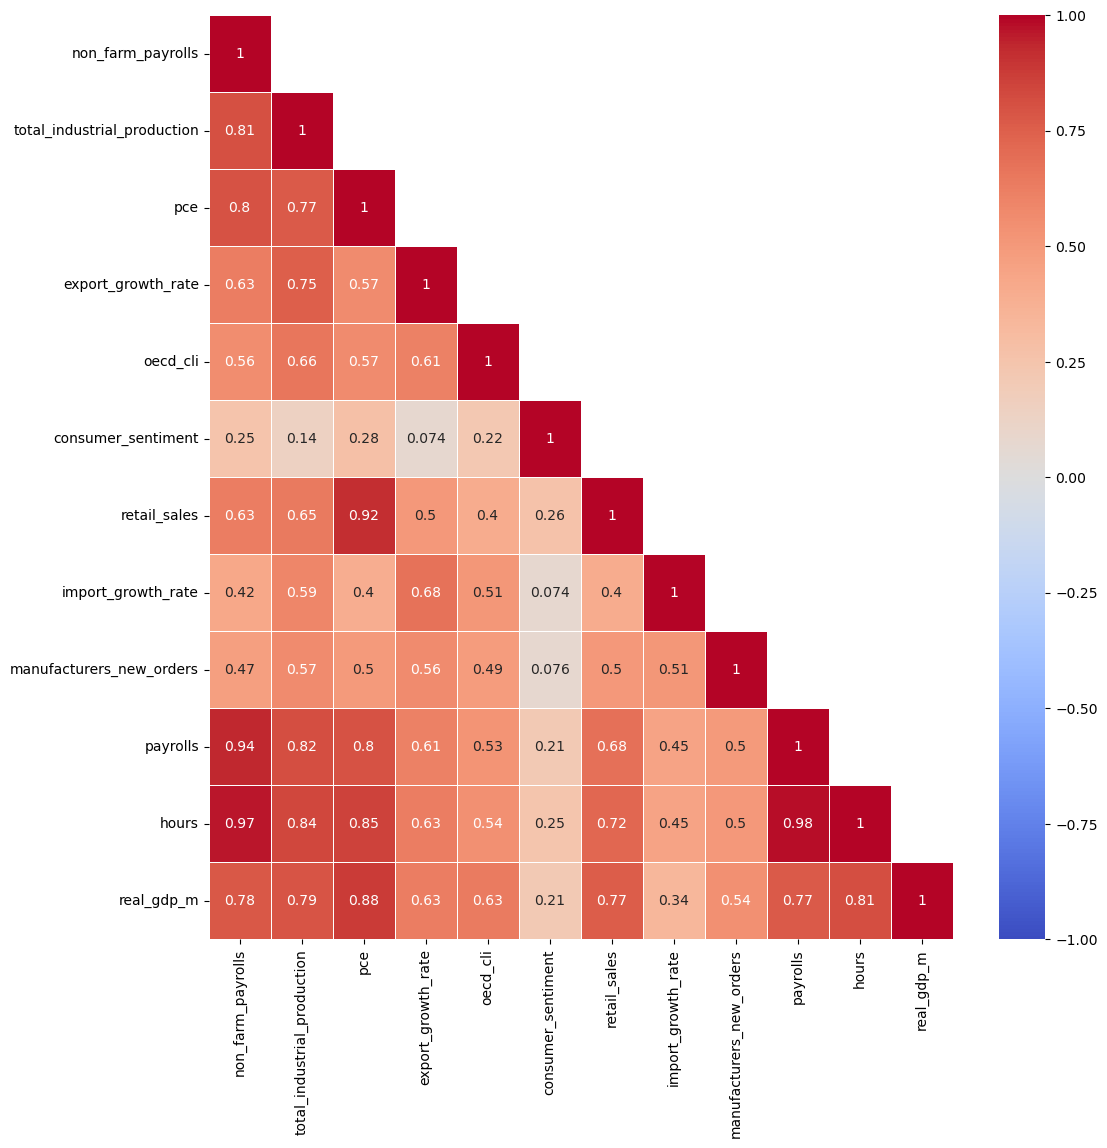

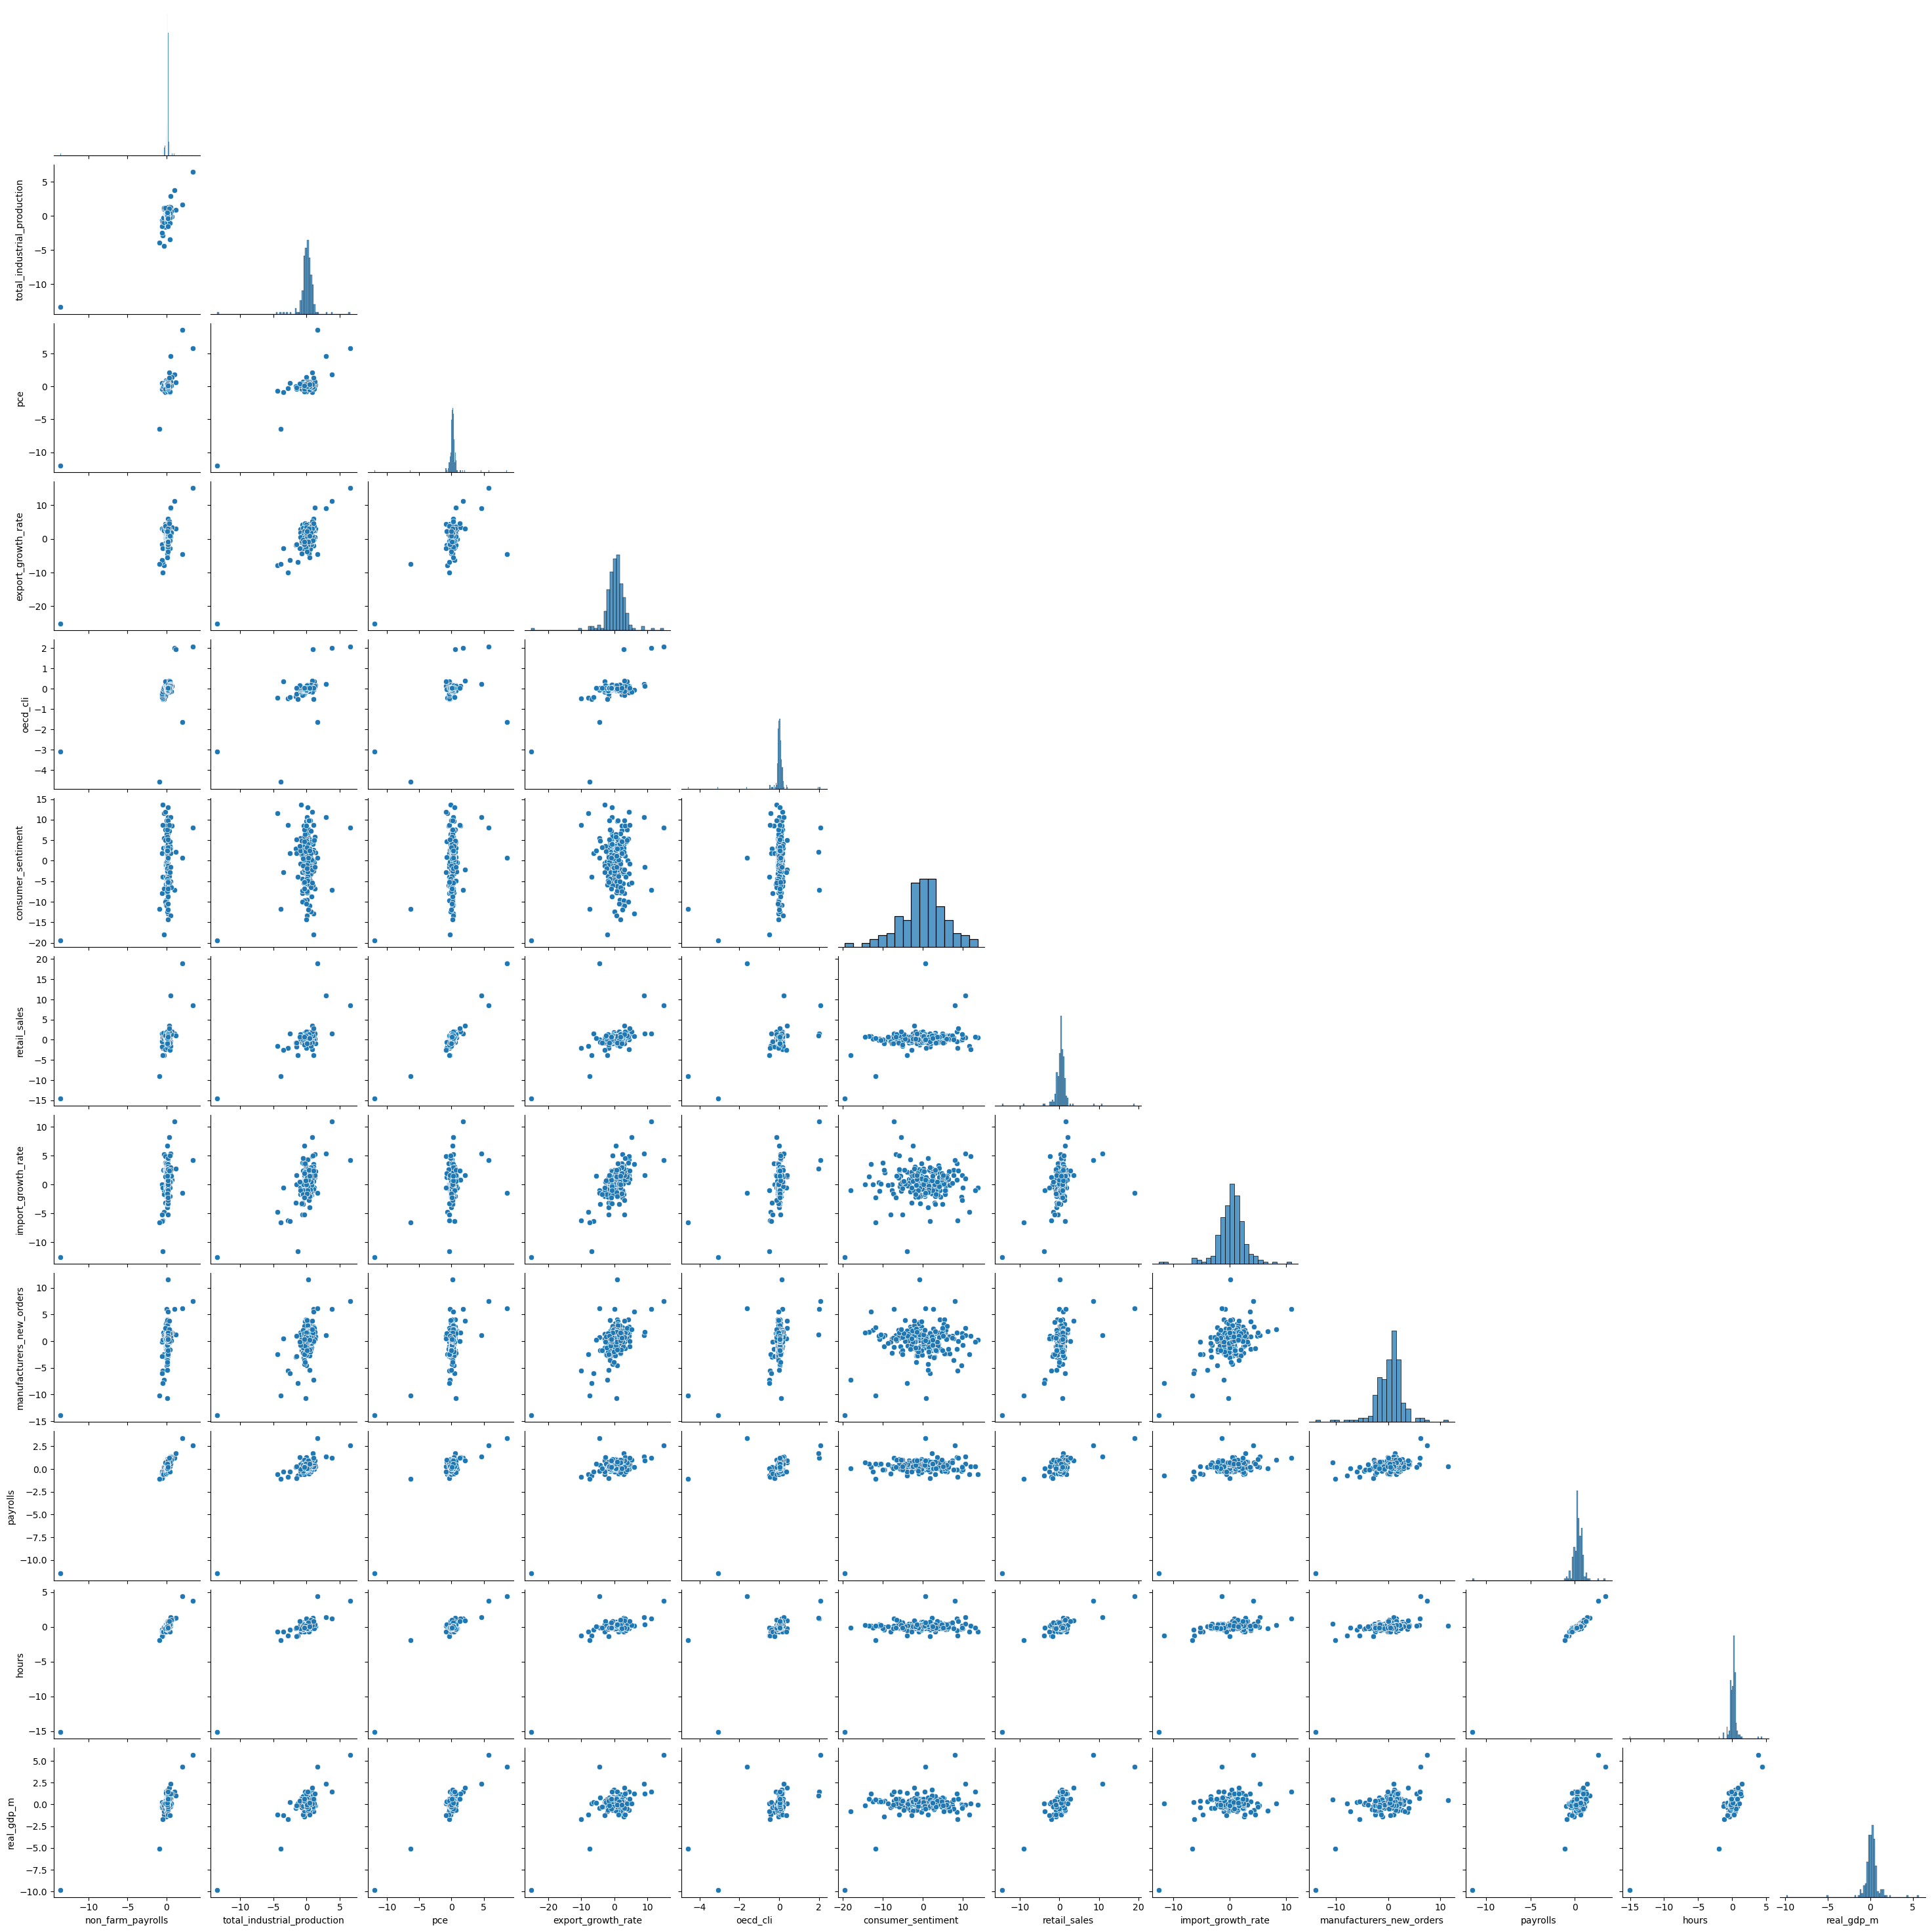

In [7]:
zm.distributions_correlations(all_features_2006_m)

##### No New Observations

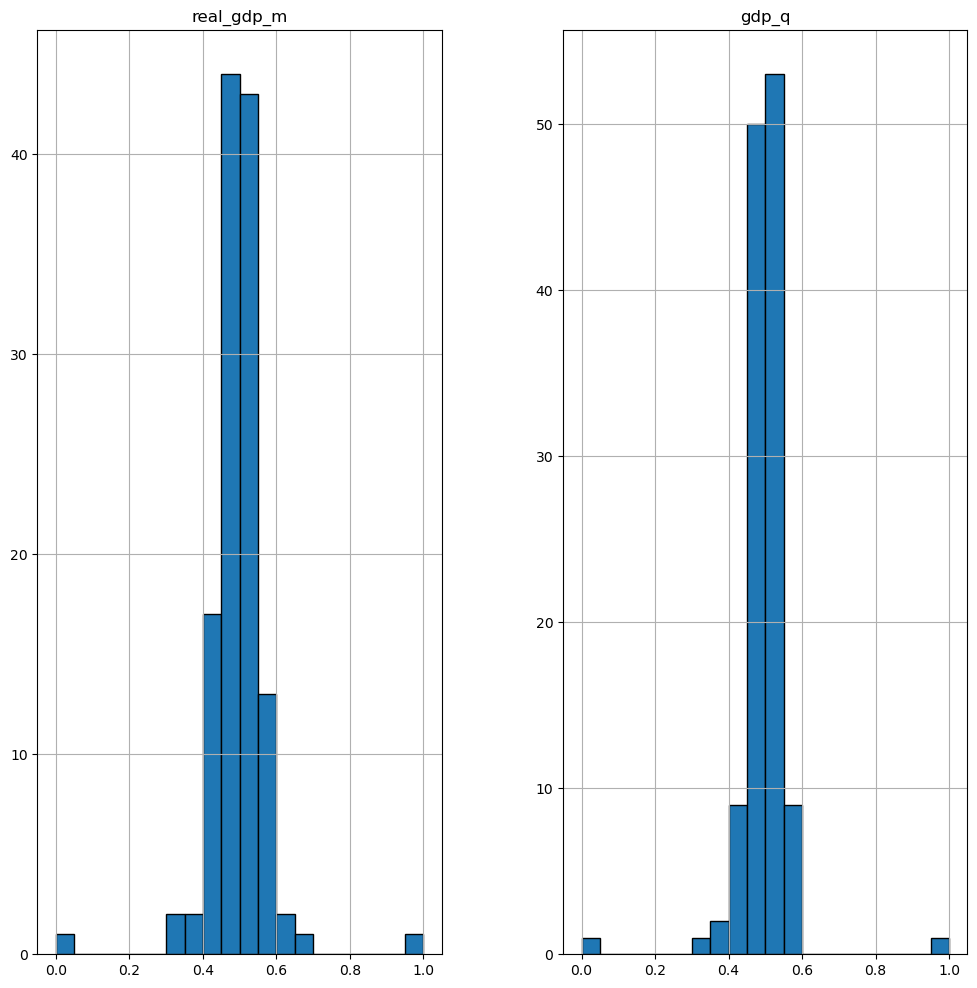

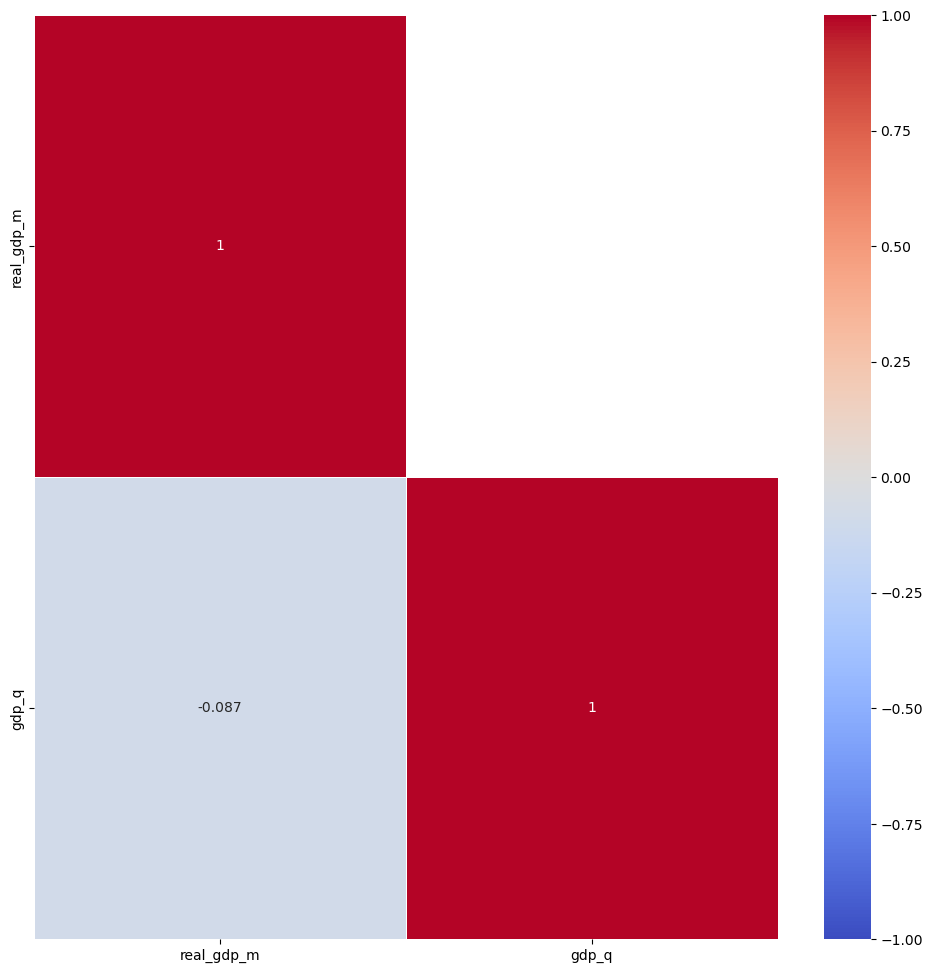

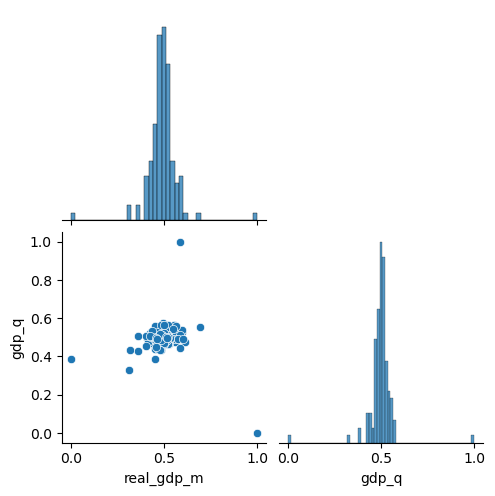

In [8]:
zm.distributions_correlations(gdp_m_q)

##### Observations

While it is not surprising to see the distributions of both monthly (proxy) gdp and quarterly gdp have identical distributions, I would want to see how the line plots behave for these two indicators as they are almost uncorrelated.

## Line Plot Study

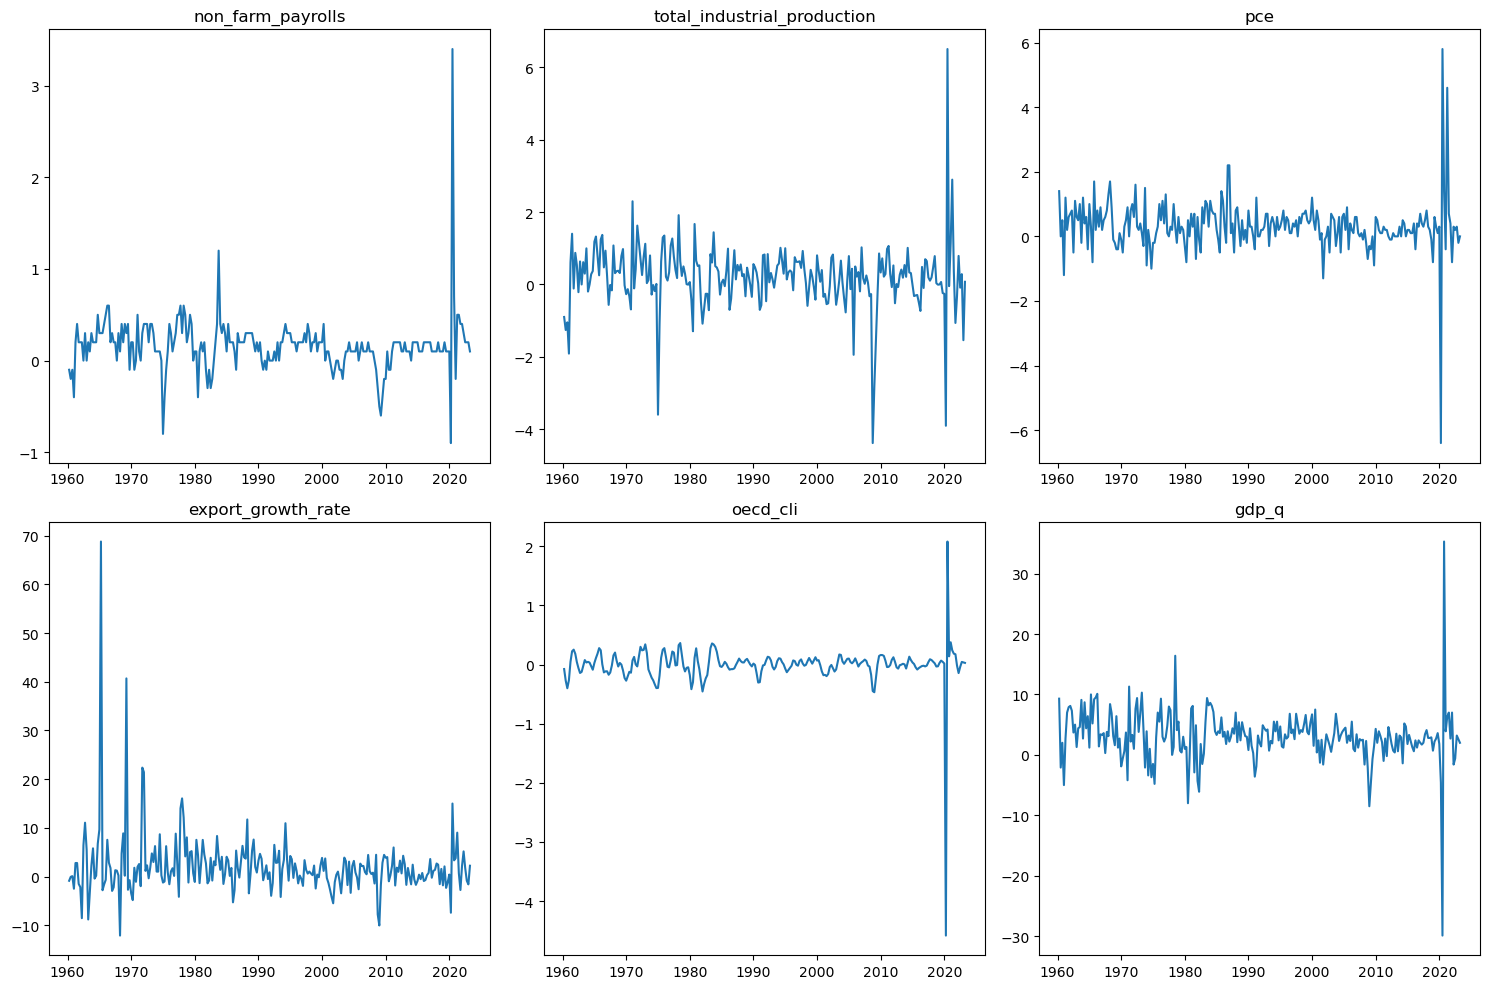

In [9]:
zm.lineplots_for_features(features_1960_q)

##### New Observations

It is noteworthy that some features exhibit very similar line plot patterns (oecd_cli, PCE, NFP) to quarterly gdp while some do not (export). This would be useful when considering what features to consider for exogenous variables if I am running a SARIMAX model for example.

A summary of similar features to gdp for me to keep track of:

Similar to gdp_q:
- oecd_cli
- NFP
- PCE
- Industrial Production

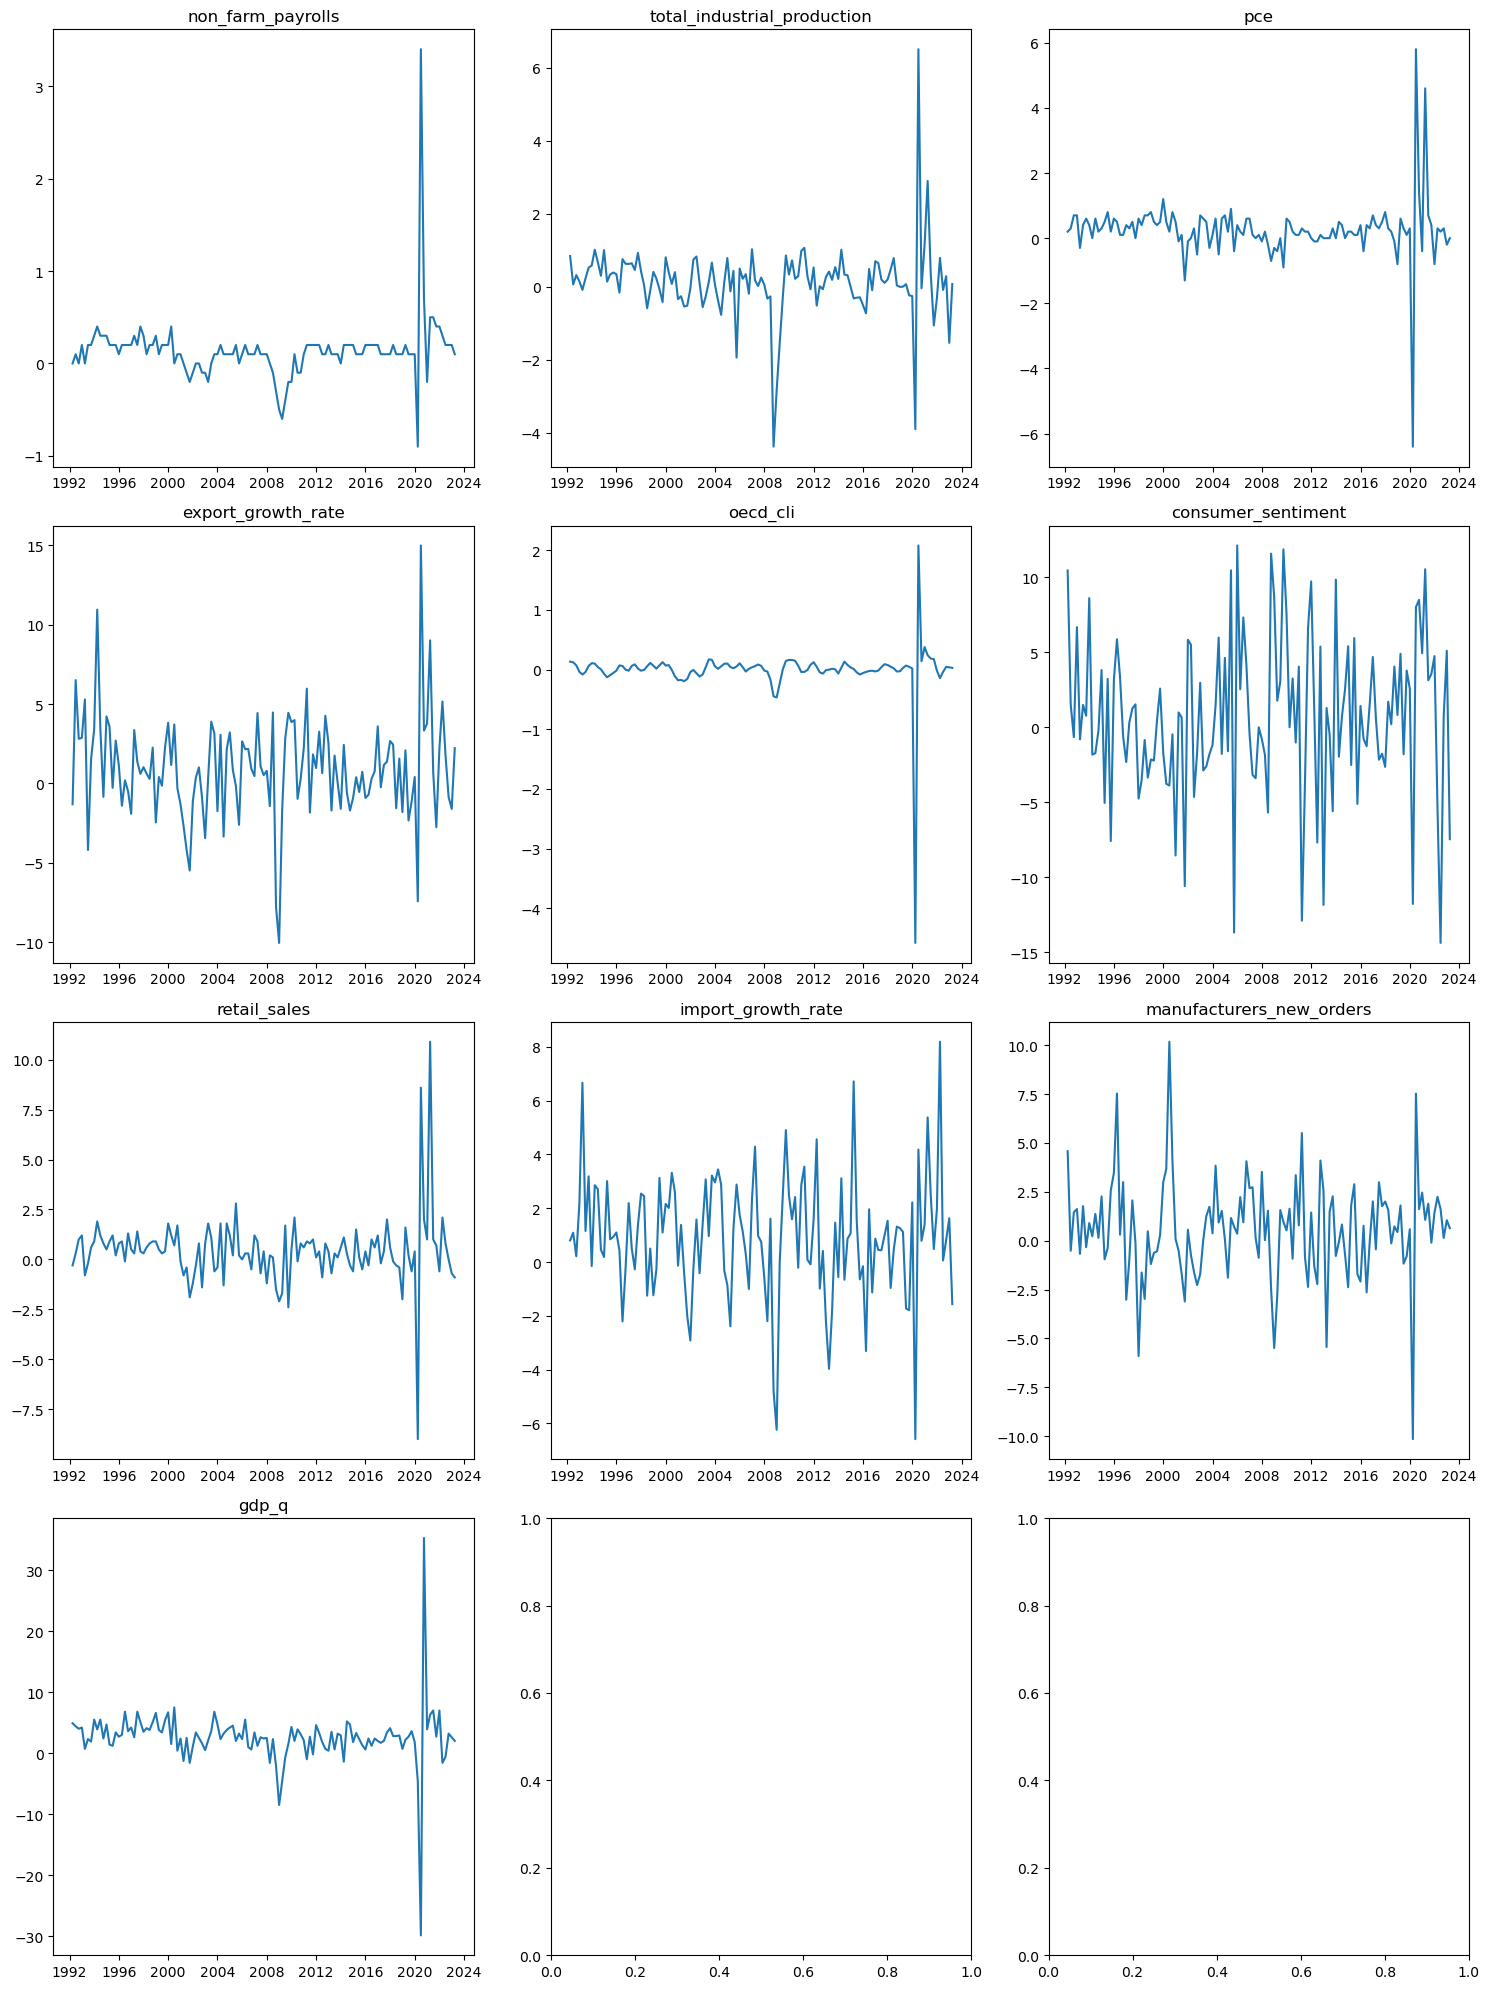

In [10]:
zm.lineplots_for_features(features_1990_q)

##### New Observations

It is perhaps interesting to see how 'noisy' the consumer sentiment survey is. Perhaps surveying people to gauge their expectations may not be as reliable an economic indicator as it is clearly alot more volatile than other features.

A summary of similar features to gdp for me to keep track of:

Similar to gdp_q:
- oecd_cli
- NFP
- PCE
- Industrial Production
- Retail Sales

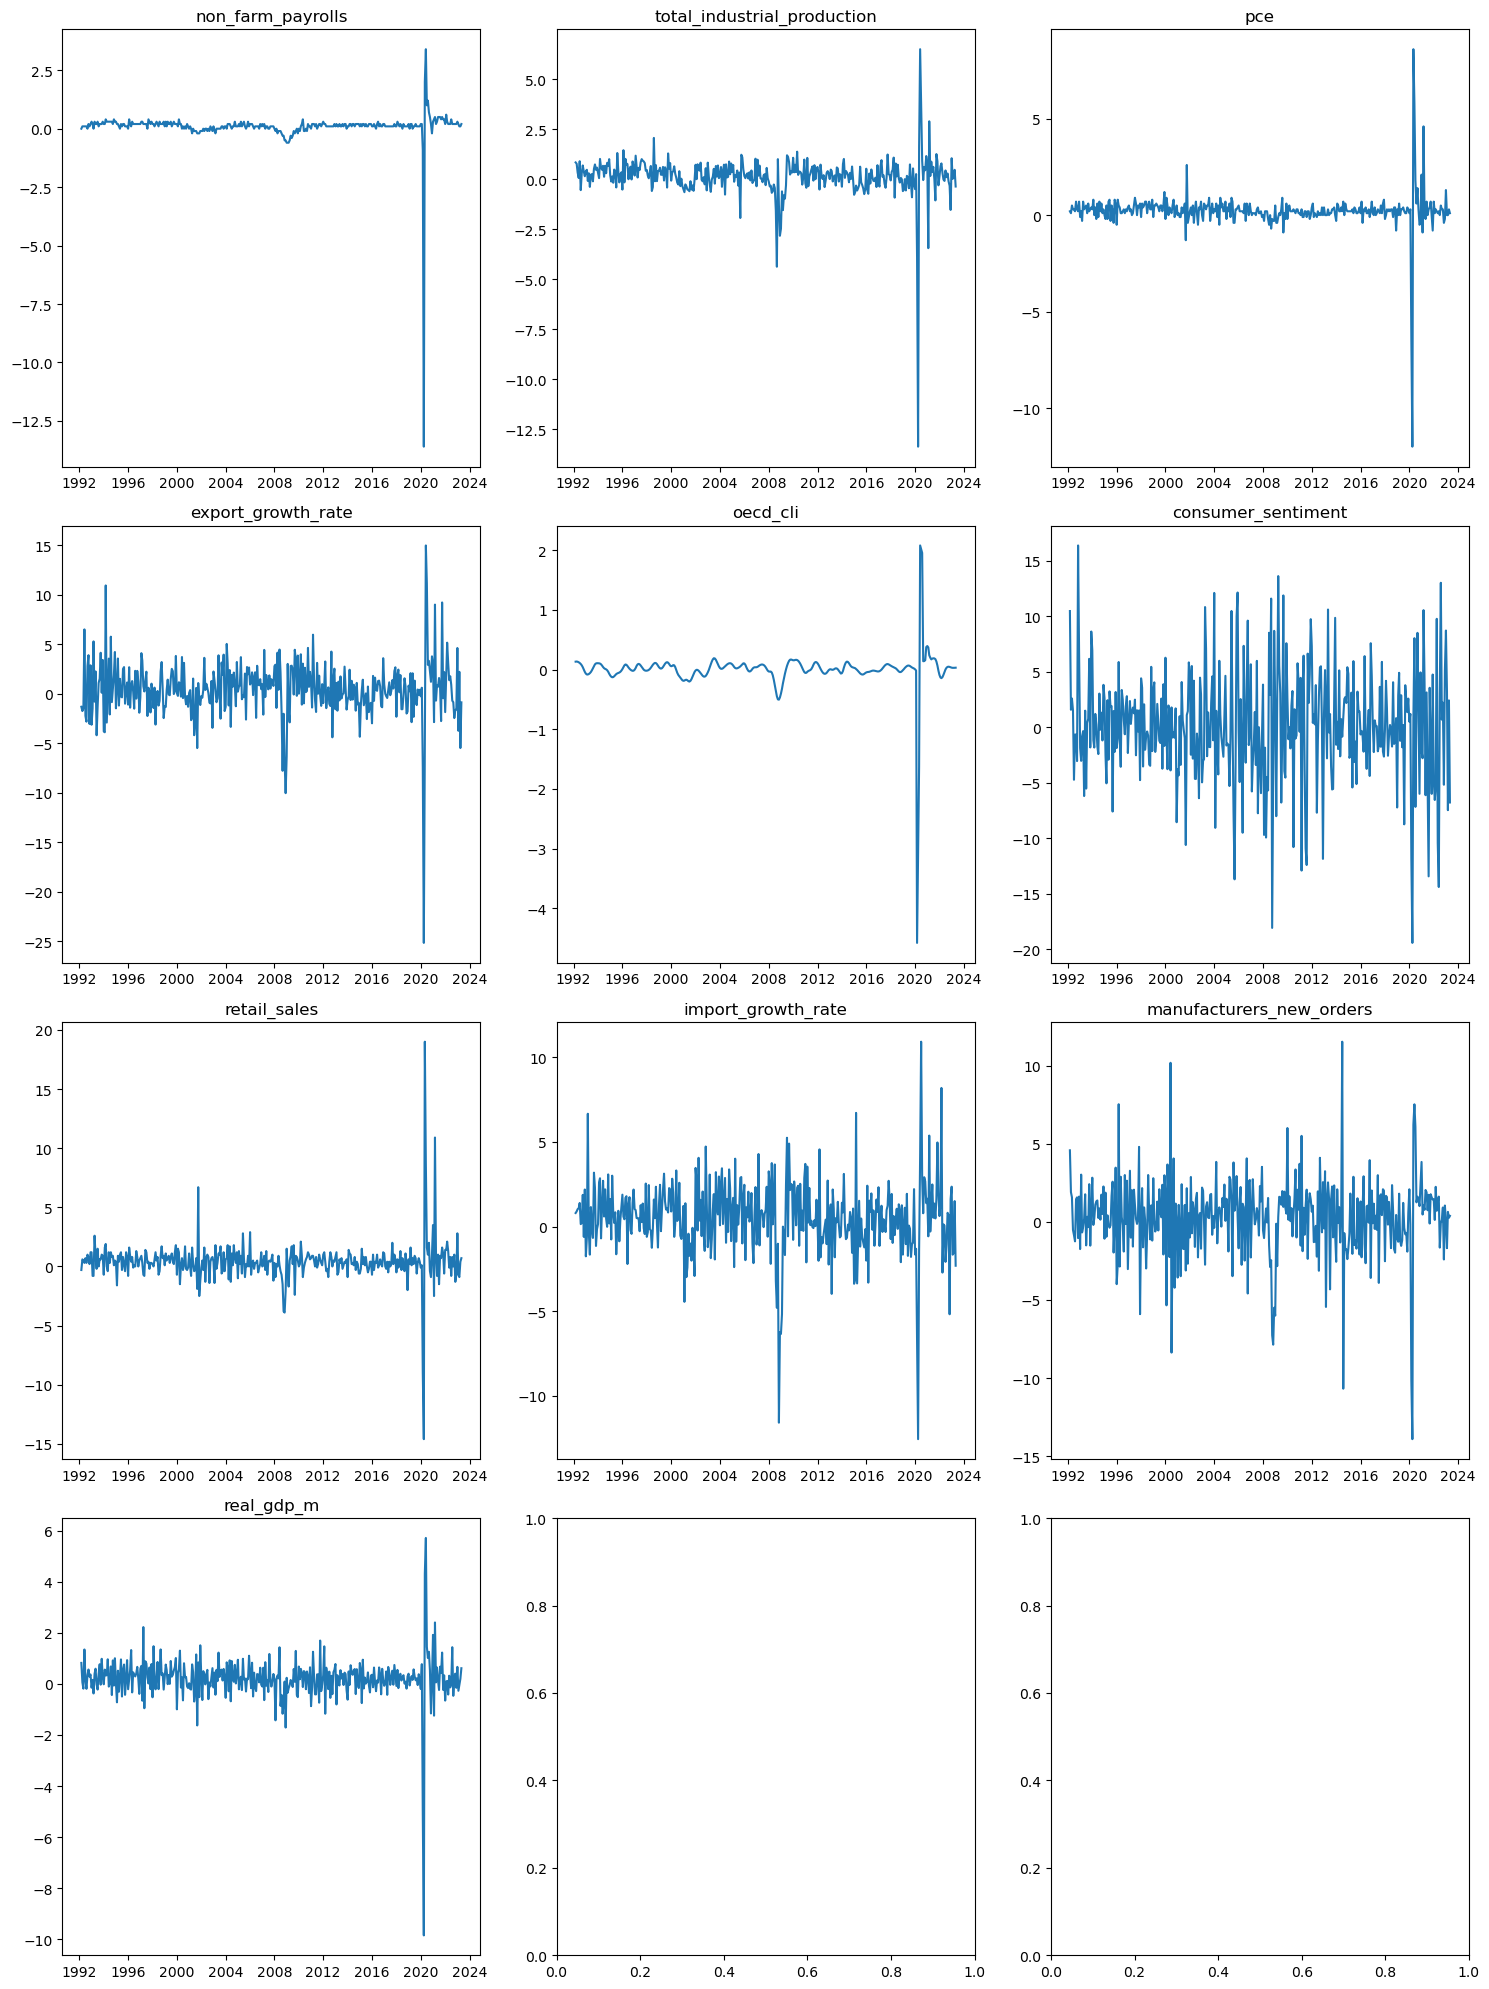

In [11]:
zm.lineplots_for_features(features_1990_m)

##### New Observations

A summary of similar features to gdp for me to keep track of:

Similar to gdp_m:
- oecd_cli
- NFP
- PCE
- Industrial Production
- Retail Sales
- Export

It is also noteworthy that Export is visually more closely related to gdp on a monthly basis (proxy) than when compared to quarterly GDP.

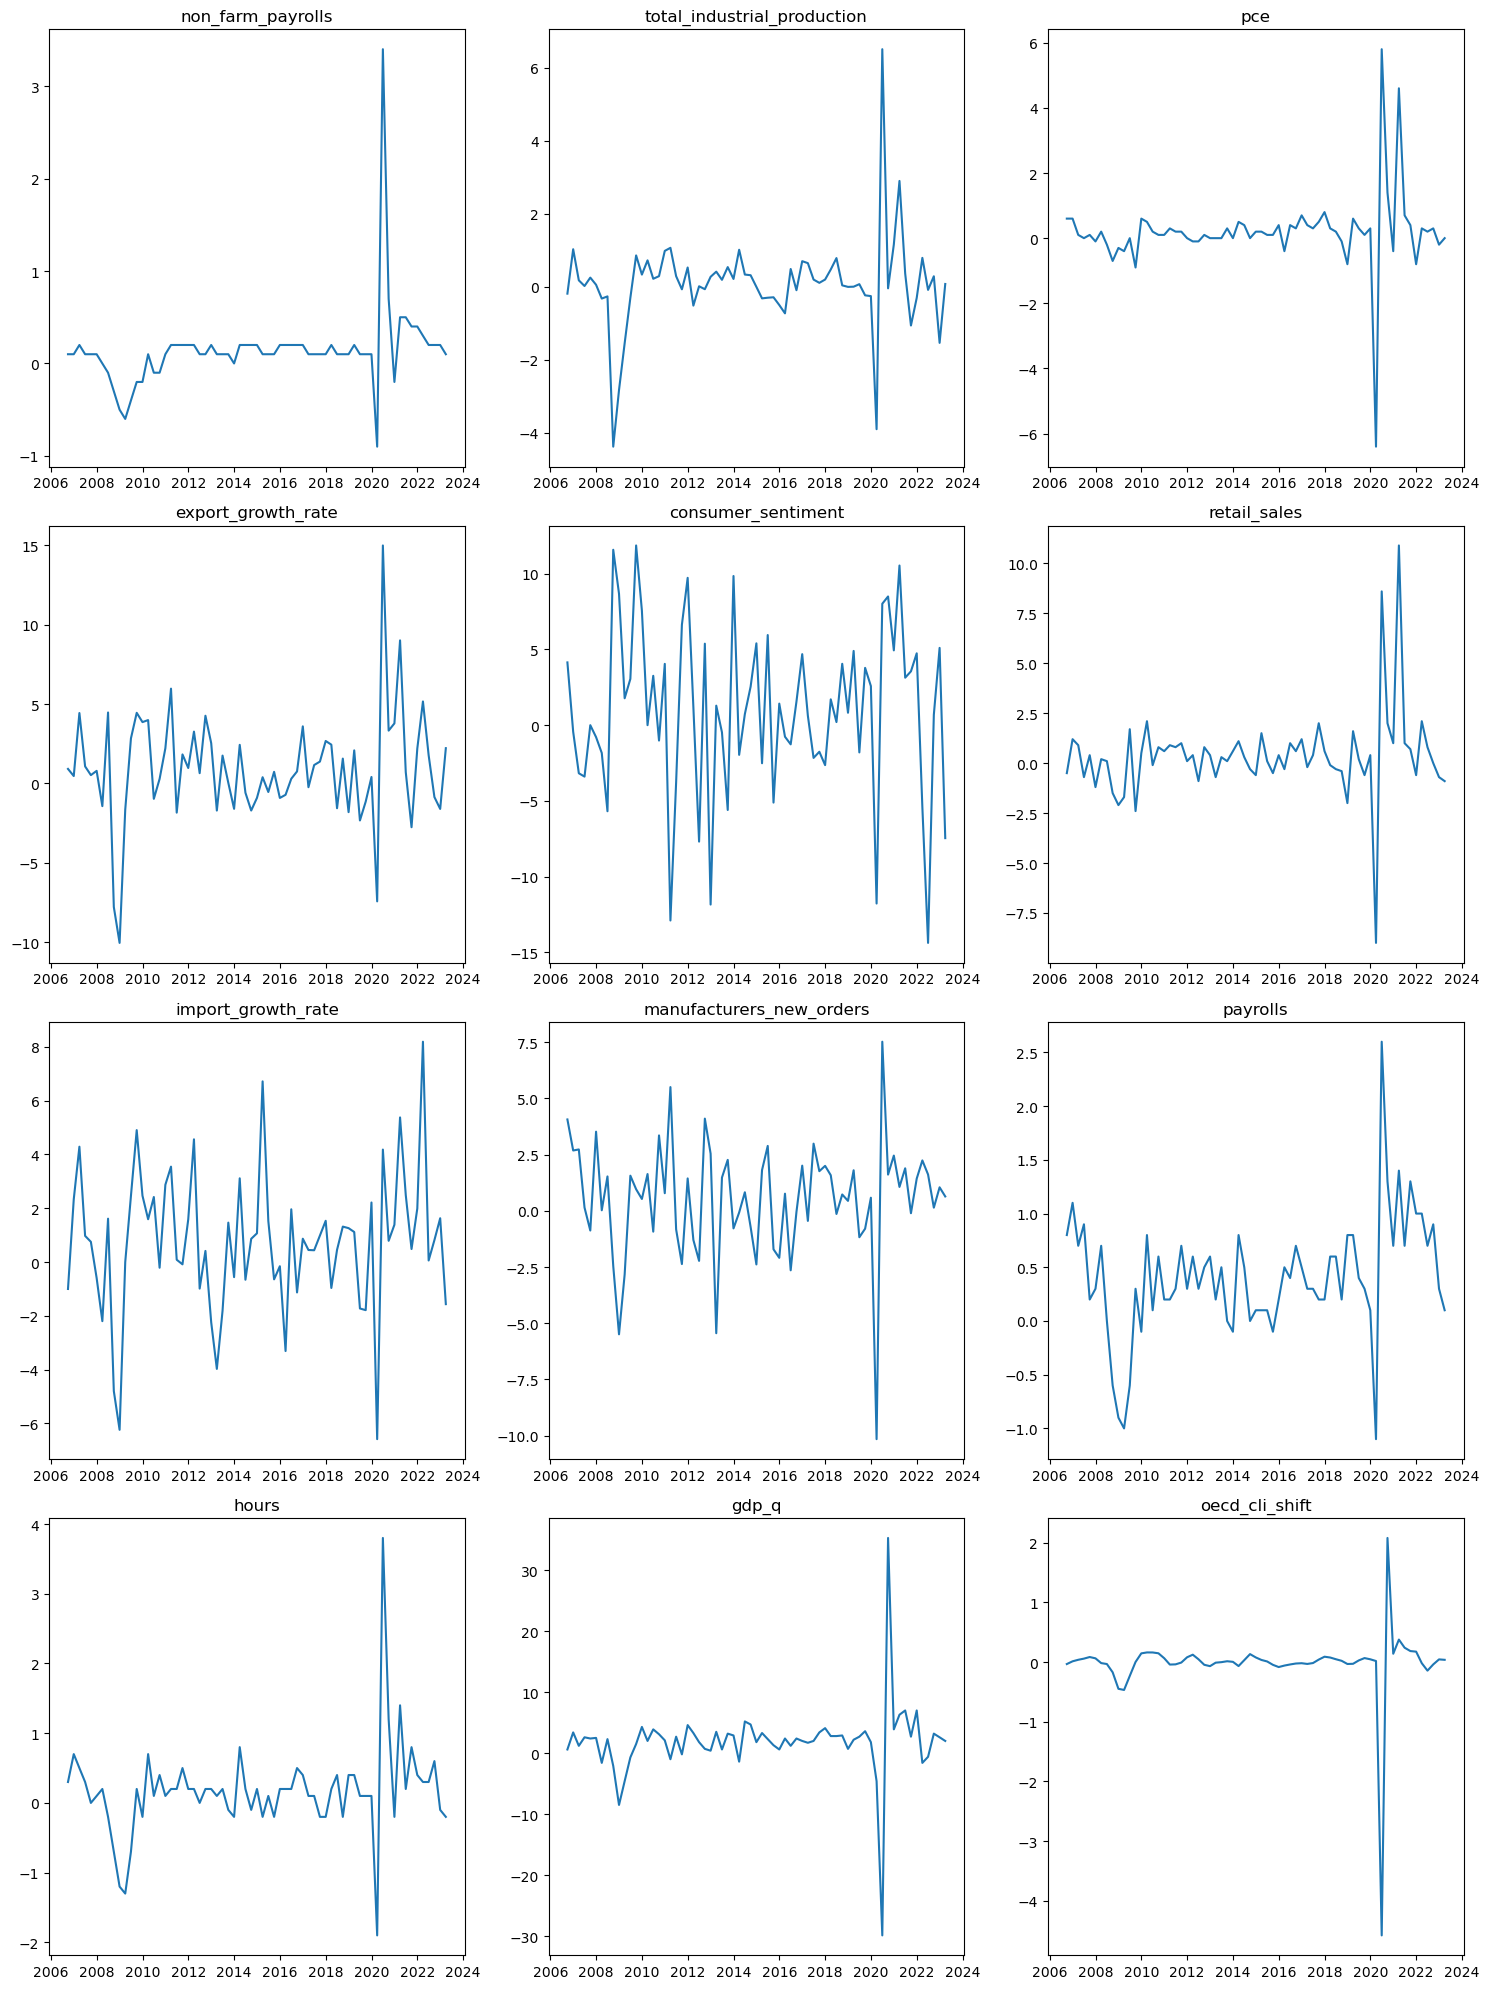

In [12]:
zm.lineplots_for_features(all_features_2006_q)

##### New Observations

A summary of similar features to gdp for me to keep track of:

Similar to gdp_q:
- oecd_cli
- NFP
- PCE
- Industrial Production
- Retail Sales
- Aggregate Weekly Hours
- Aggregate Weekly Payrolls

It is also noteworthy that more recent economic statistics such as aggregate weekly hours worked and aggregate weekly payrolls are somewhat representative of quarterly GDP.

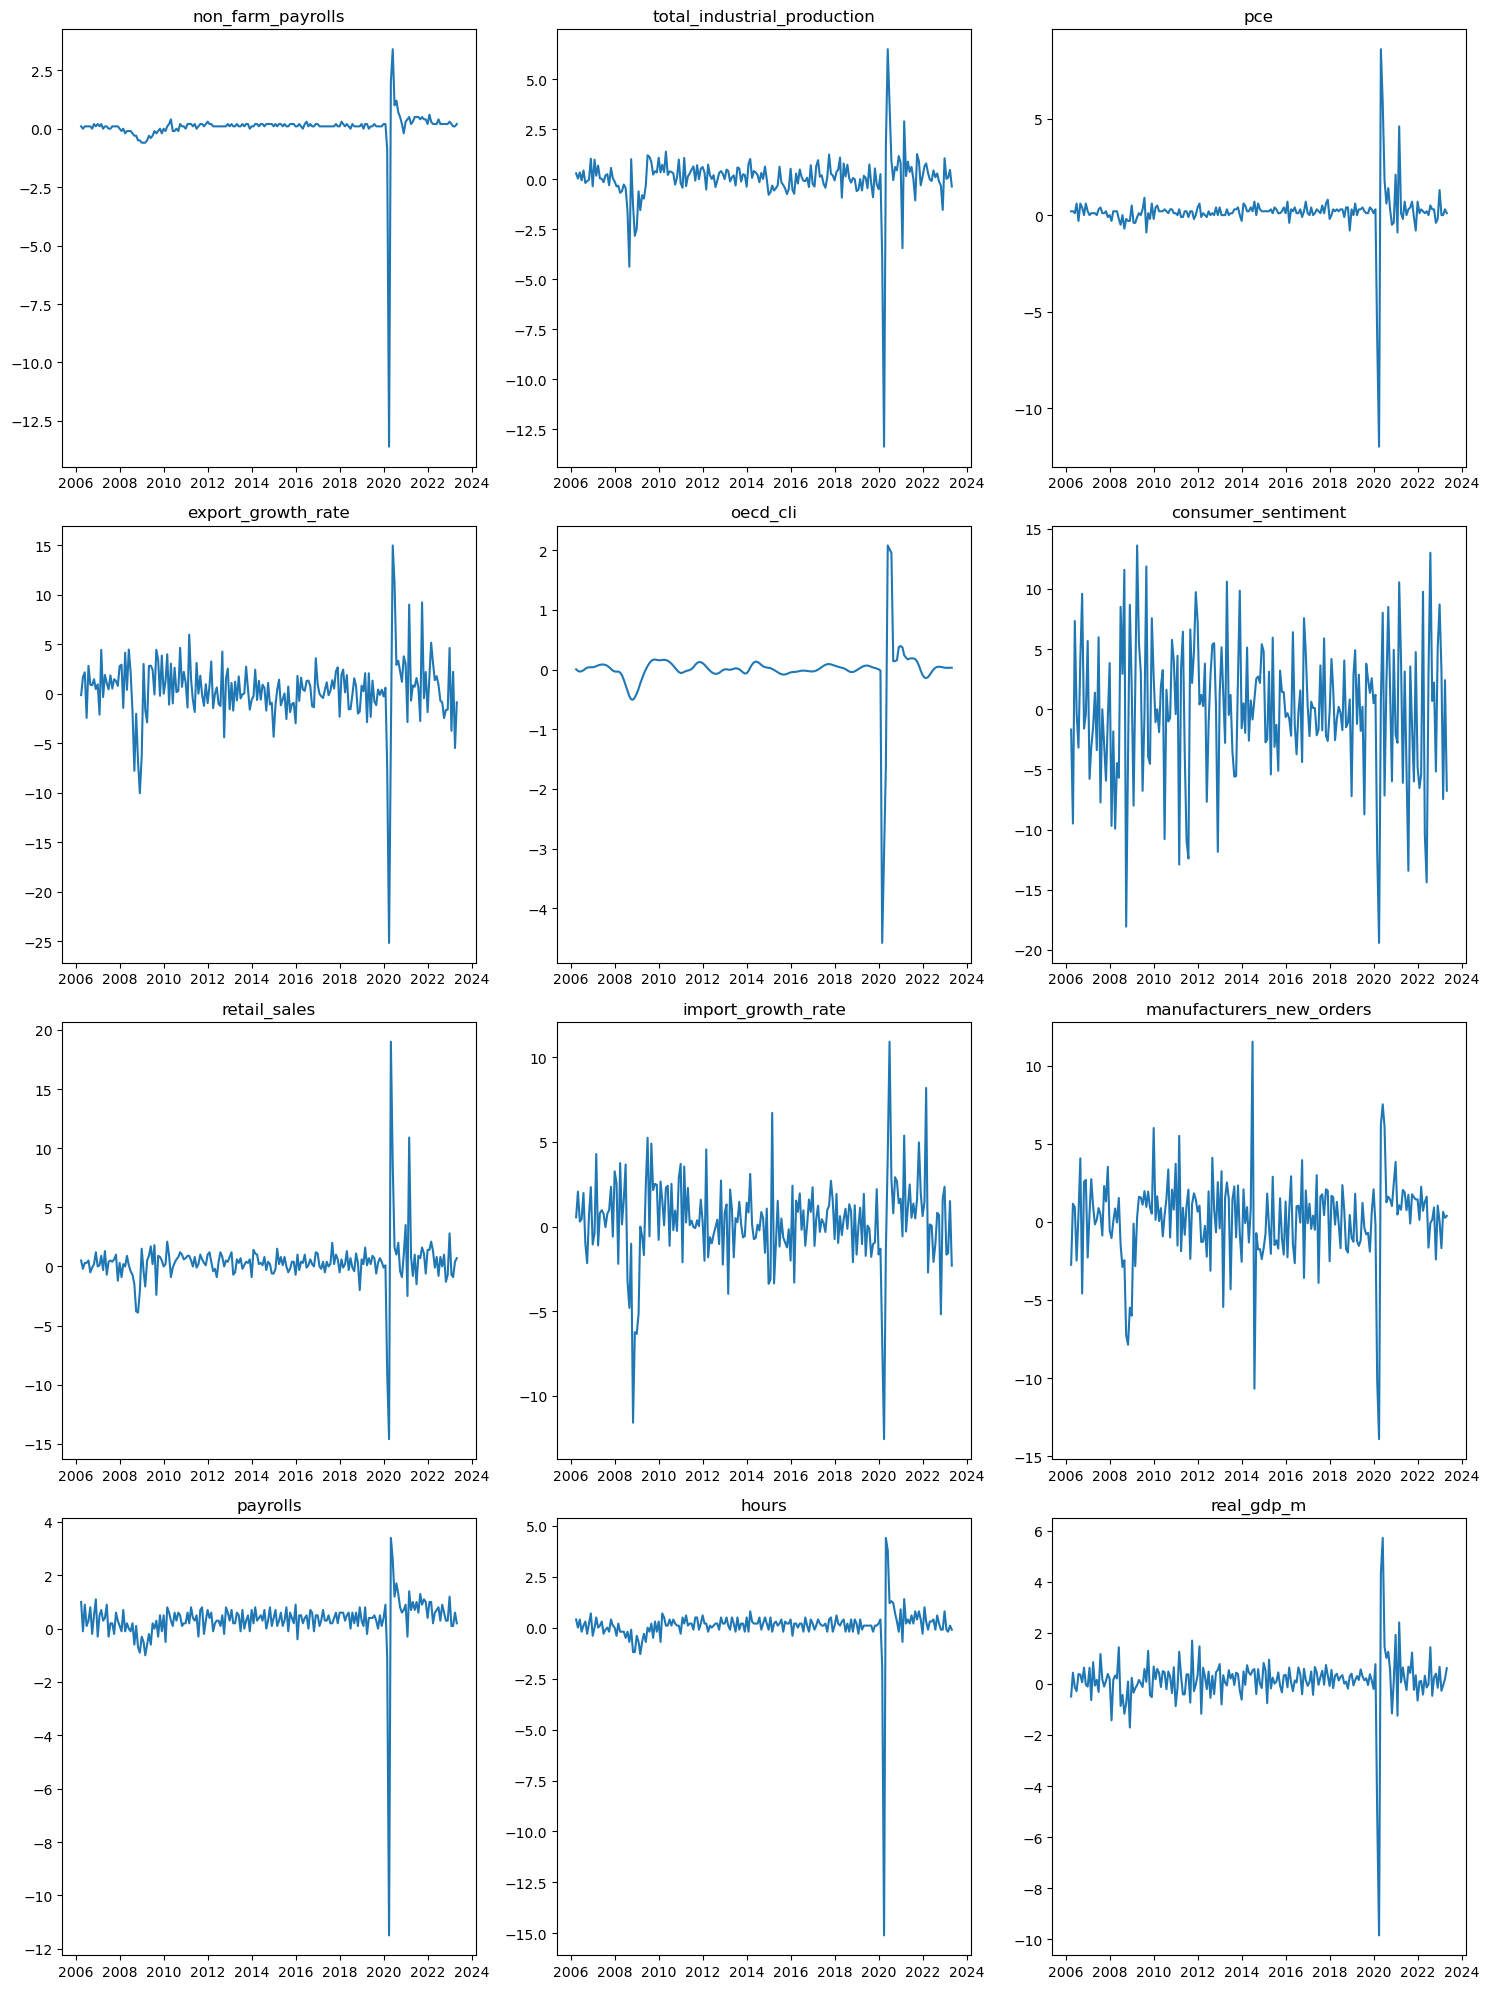

In [13]:
zm.lineplots_for_features(all_features_2006_m)

##### New Observations

A summary of similar features to gdp for me to keep track of:

Similar to gdp_m:
- oecd_cli
- NFP
- PCE
- Exports
- Industrial Production
- Retail Sales
- Aggregate Weekly Hours
- Aggregate Weekly Payrolls

It is interesting that despite the difference in correlation behaviours between monthly GDP (Proxy) and quarterly GDP, the features that visually exhibit similar patterns are almost identical with Exports being the exception for quarterly GDP.

## Monthly (Proxy) GDP and Quarterly GDP Study

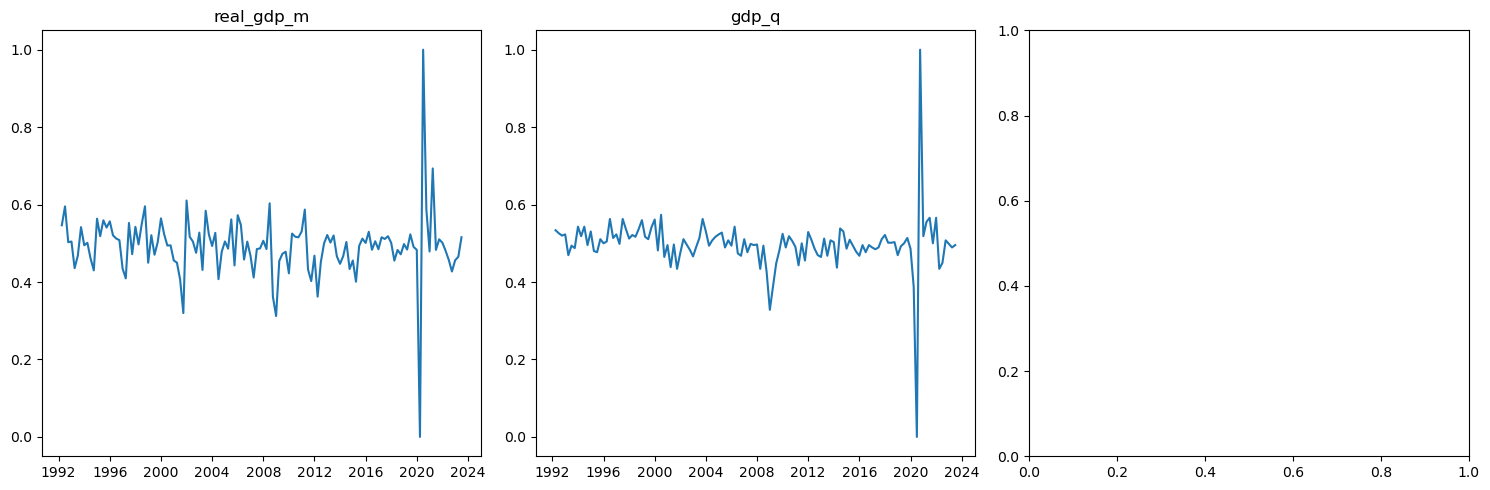

In [14]:
zm.lineplots_for_features(gdp_m_q)

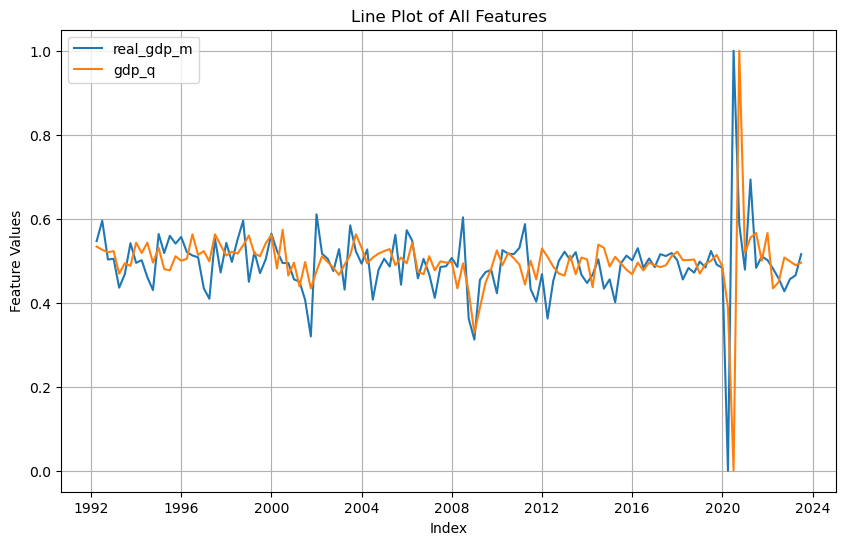

In [15]:
# Plot all features on the same line plot
zm.plot_all_features(gdp_m_q)

##### Observation

It is interesting that monthly (proxy) GDP when aggregated on a quarterly basis produces an identical chart but on a lag, especially so in later years. I'd like to shift monthly gdp by 1 period and study the difference.

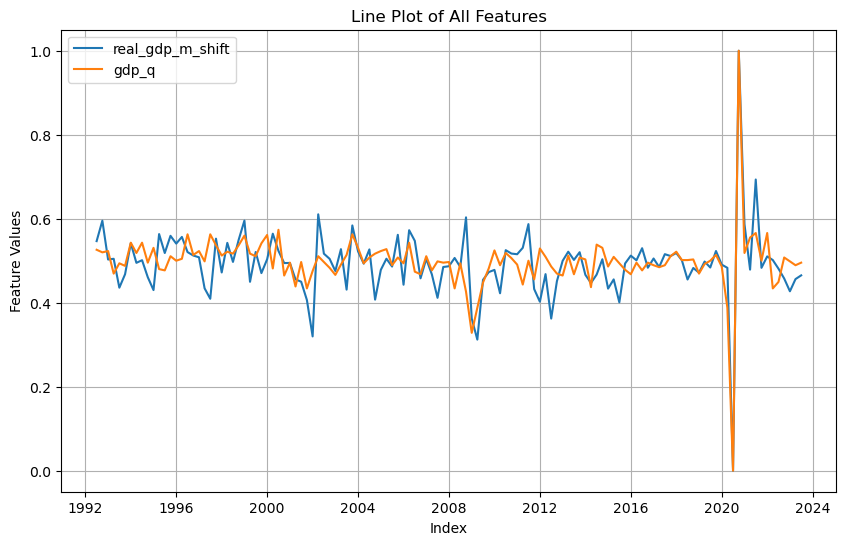

In [16]:
# Shifting real_gdp_m by 1 & dropping NaN
gdp_m_q['real_gdp_m_shift'] = gdp_m_q['real_gdp_m'].shift(1)
gdp_m_q = gdp_m_q.dropna()

# Redefining new df to include shift real_gdp_m_shift and gdp_q only
gdp_m_q_shift = gdp_m_q[['real_gdp_m_shift', 'gdp_q']]

# Plot all features on the same line plot
zm.plot_all_features(gdp_m_q_shift)

In [17]:
# Calculating RMSE between monthly (Shifted, Proxy) GDP and quarterly GDP.
np.sqrt(mean_squared_error(gdp_m_q_shift['gdp_q'], gdp_m_q_shift['real_gdp_m_shift']))

0.05419423006609202

In [18]:
# Statistically measuring difference between monthly shifted proxy GDP and quarterly GDP
zm.compare_columns(gdp_m_q_shift, 'gdp_q', 'real_gdp_m_shift', alpha=0.05)

# Null Hypothesis: The features are the same

Null Hypothesis: The features specified are NOT statistically different

P Value: 0.5832253543106147
Alpha: 0.05


'There is no significant difference between the two columns.'

##### Observations

While the two plots appear somewhat identical, it is noteworthy that monthly (proxy) GDP is visually accurate when considered to be on a lag of 1 quarter.

When calculating RMSE for both scaled values of shifted monthly (Proxy) GDP and quarterly GDP, we get a low value of 0.05 out of a possible maximum of 1 and a minimum of 0. I would say that this is a low RMSE and supportive of the hypothesis that real_gdp_m when calculated on a lag.

Further, I carried out a statistical t-test to determine if the values in the columns are statistically different to one another and there is no statistical evidence to prove that the values in each column are different.

In [19]:
# Shifting the same for unscaled gdp_m_q df for modelling 
gdp_m_q_uns['real_gdp_m_shift'] = gdp_m_q_uns['real_gdp_m'].shift(1)
gdp_m_q_uns = gdp_m_q_uns.dropna()

gdp_m_q_uns.head()

real_gdp_m  gdp_q  real_gdp_m_shift
Period                                         
1992-06-30    1.346099    4.4          0.821037
1992-09-30    0.348912    4.0          1.346099
1992-12-31    0.367327    4.2          0.348912
1993-03-31   -0.374891    0.7          0.367327
1993-06-30   -0.029352    2.3         -0.374891

## Autocorrelation Study

### ADF Test

In [20]:
# ADF Test
zm.df_loop(features_1960_q, 0.05)

Feature: non_farm_payrolls, P-value: (0.01, False)
Feature: total_industrial_production, P-value: (0.01, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.01, False)
Feature: oecd_cli, P-value: (0.01, False)
Feature: gdp_q, P-value: (0.01, False)


##### Comment
All features are stationary.

In [21]:
# ADF Test
zm.df_loop(features_1990_q, 0.05)

Feature: non_farm_payrolls, P-value: (0.07320578492184099, True)
Feature: total_industrial_production, P-value: (0.01, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.01, False)
Feature: oecd_cli, P-value: (0.01, False)
Feature: consumer_sentiment, P-value: (0.01, False)
Feature: retail_sales, P-value: (0.01, False)
Feature: import_growth_rate, P-value: (0.01, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: gdp_q, P-value: (0.01, False)


In [22]:
# Differencing for NFP
features_1990_q['non_farm_payrolls_diff'] = features_1990_q['non_farm_payrolls'].diff()

# Drop row due to NaN as a result of .diff() & Drop 'non_farm_payrolls' column
features_1990_q_diff = features_1990_q.dropna(axis=0)
features_1990_q_diff.drop(columns=['non_farm_payrolls'], inplace=True)

# ADF Test
zm.df_loop(features_1990_q_diff, 0.05)

Feature: total_industrial_production, P-value: (0.01, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.01, False)
Feature: oecd_cli, P-value: (0.01, False)
Feature: consumer_sentiment, P-value: (0.01, False)
Feature: retail_sales, P-value: (0.01, False)
Feature: import_growth_rate, P-value: (0.01, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: gdp_q, P-value: (0.01, False)
Feature: non_farm_payrolls_diff, P-value: (0.01, False)


/var/folders/d5/f50dg_px5h73wbslkd_gnp5r0000gn/T/ipykernel_9803/2278009998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_1990_q_diff.drop(columns=['non_farm_payrolls'], inplace=True)


##### Comment
All features are stationary.

In [23]:
# ADF Test
zm.df_loop(features_1990_m, 0.05)

Feature: non_farm_payrolls, P-value: (0.01, False)
Feature: total_industrial_production, P-value: (0.01, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.01, False)
Feature: oecd_cli, P-value: (0.01, False)
Feature: consumer_sentiment, P-value: (0.01, False)
Feature: retail_sales, P-value: (0.01, False)
Feature: import_growth_rate, P-value: (0.01, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: real_gdp_m, P-value: (0.01, False)


##### Comment
All features are stationary.

In [24]:
# ADF Test
zm.df_loop(all_features_2006_q, 0.05)

Feature: non_farm_payrolls, P-value: (0.060694424686849685, True)
Feature: total_industrial_production, P-value: (0.011998573670763055, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.022910933230688893, False)
Feature: consumer_sentiment, P-value: (0.045080149297838254, False)
Feature: retail_sales, P-value: (0.035720867598167484, False)
Feature: import_growth_rate, P-value: (0.027045647776628982, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: payrolls, P-value: (0.034466398809221095, False)
Feature: hours, P-value: (0.03840805919875737, False)
Feature: gdp_q, P-value: (0.01, False)
Feature: oecd_cli_shift, P-value: (0.01, False)


In [25]:
# Differencing for NFP
all_features_2006_q['non_farm_payrolls_diff'] = all_features_2006_q['non_farm_payrolls'].diff()

# Drop row due to NaN as a result of .diff() & Drop 'non_farm_payrolls' column
all_features_2006_q_diff = all_features_2006_q.dropna(axis=0)
all_features_2006_q_diff.drop(columns=['non_farm_payrolls'], inplace=True)

# ADF Test
zm.df_loop(all_features_2006_q_diff, 0.05)

Feature: total_industrial_production, P-value: (0.012505848236353789, False)


/var/folders/d5/f50dg_px5h73wbslkd_gnp5r0000gn/T/ipykernel_9803/2502134897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_features_2006_q_diff.drop(columns=['non_farm_payrolls'], inplace=True)


Feature: pce, P-value: (0.011369807045128405, False)
Feature: export_growth_rate, P-value: (0.024532055644508433, False)
Feature: consumer_sentiment, P-value: (0.04612845868070687, False)
Feature: retail_sales, P-value: (0.04224945466405566, False)
Feature: import_growth_rate, P-value: (0.03364145474179087, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: payrolls, P-value: (0.03117567520772498, False)
Feature: hours, P-value: (0.03877799987620893, False)
Feature: gdp_q, P-value: (0.01, False)
Feature: oecd_cli_shift, P-value: (0.01, False)
Feature: non_farm_payrolls_diff, P-value: (0.01, False)


##### Comment
All features are stationary.

In [26]:
# ADF Test
zm.df_loop(all_features_2006_m, 0.05)

Feature: non_farm_payrolls, P-value: (0.01, False)
Feature: total_industrial_production, P-value: (0.01, False)
Feature: pce, P-value: (0.01, False)
Feature: export_growth_rate, P-value: (0.01, False)
Feature: oecd_cli, P-value: (0.01, False)
Feature: consumer_sentiment, P-value: (0.01, False)
Feature: retail_sales, P-value: (0.01, False)
Feature: import_growth_rate, P-value: (0.01, False)
Feature: manufacturers_new_orders, P-value: (0.01, False)
Feature: payrolls, P-value: (0.01, False)
Feature: hours, P-value: (0.01, False)
Feature: real_gdp_m, P-value: (0.01, False)


##### Comment
All features are stationary.

##### Summary of stationary Dfs of interest for Autocorrelation studies:

1. features_1960_q
2. features_1990_q_diff
3. features_1990_m
4. all_features_2006_q_diff
5. all_features_2006_m

In [27]:
# ADF Test
zm.df_loop(gdp_m_q, 0.05)

Feature: real_gdp_m, P-value: (0.01, False)
Feature: gdp_q, P-value: (0.01, False)
Feature: real_gdp_m_shift, P-value: (0.01, False)


##### Comment
All features are stationary.

### ACF Plots

In this section, I will be using ACF plots to identify:

1. Seasonality (if any) 
2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)
3. Determining the lag factor (m) for modeling.

I will be using the above mentioned information for modeling further downstream. Therefore, for each feature of each dataframe, I will be plotting ACF plots with a lag of 60. Also, I will be using AutoARIMA function to model the time series data, the function will be searching through a range of possible values for p and q, fit multiple ARIMA models and select the model with the lowest AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion), indicating the best fit according to the chosen information criterion.

I note that a significant number of features are adjusted for seasonality and I would not expect to see prevalent seasonality patterns.

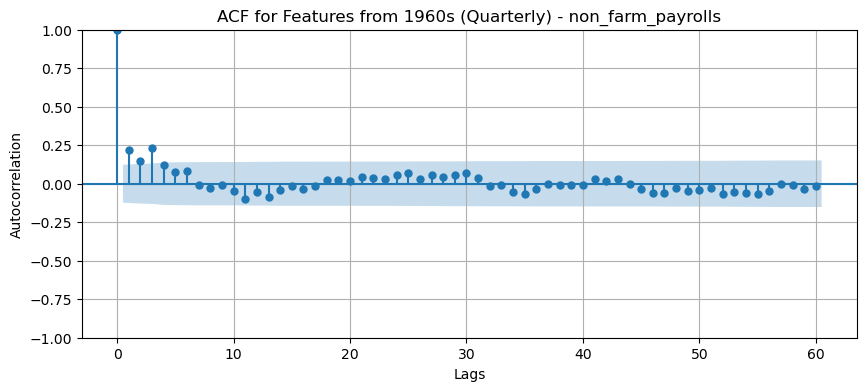

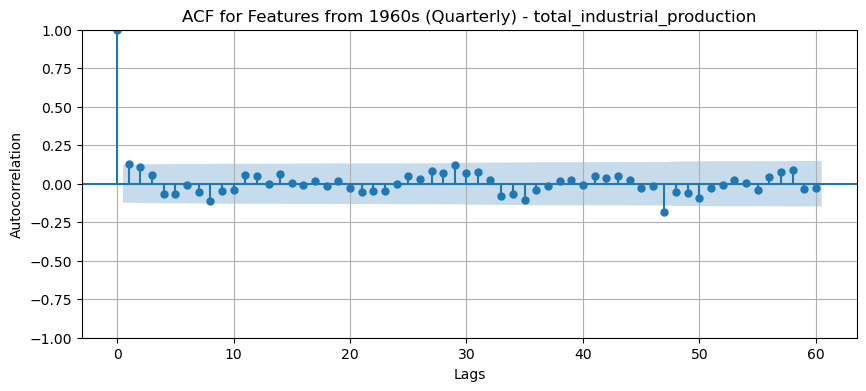

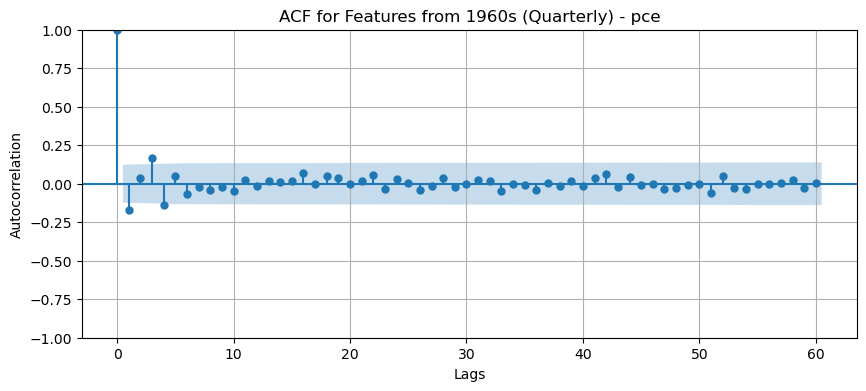

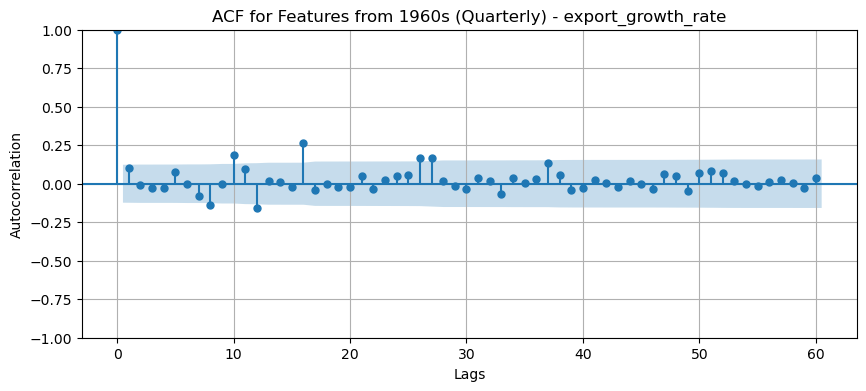

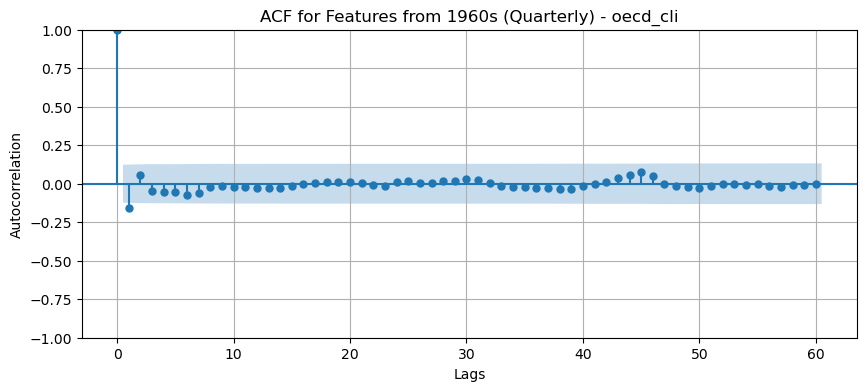

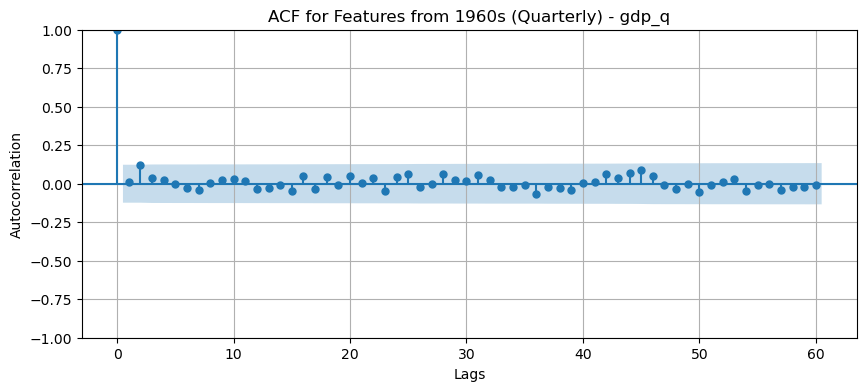

In [28]:
zm.plot_acf_for_features(features_1960_q, 'Features from 1960s (Quarterly)', lags=60)

##### Observations

1. Seasonality

   There are no significant seasonalities within the correlogram of the target variable (gdp_q) and the correlograms of the features of the dataframe.

2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)

   Visually, I would say that most of the features exhibits similar autocorrelation(AC) patterns with the target variable, with the exception of Exports. I do note that OECD CLI exhibits the most similar AC patterns to gdp_q

3. Determining the lag factor (m) for modeling.

   I would say that a lag factor of 2 may be considered for modeling as it is the only significant spike in its correlogram.

Similar ACF patterns to gdp_q:
- oecd_cli

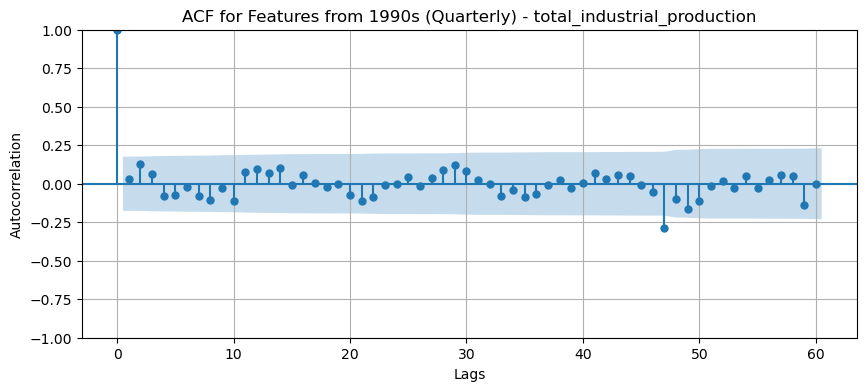

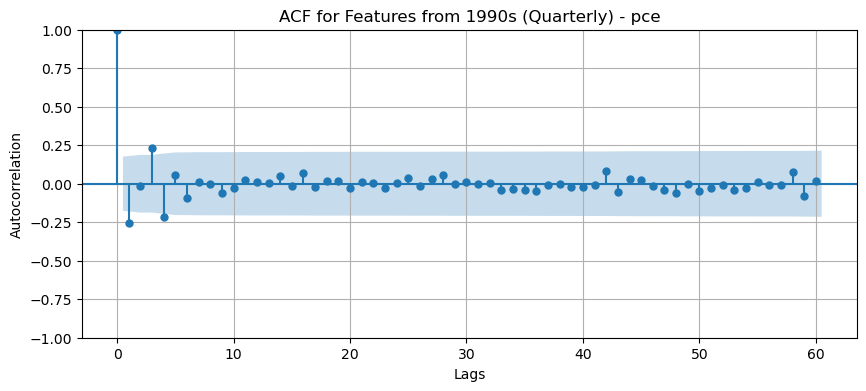

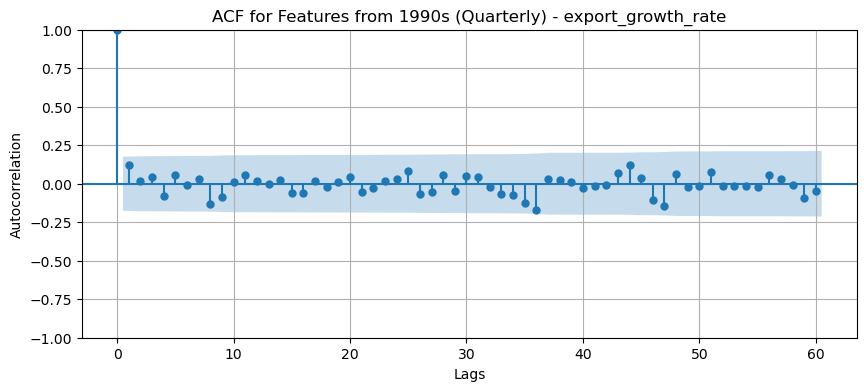

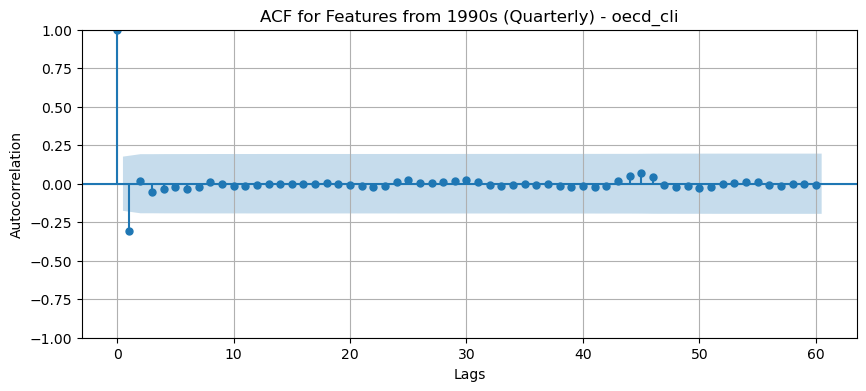

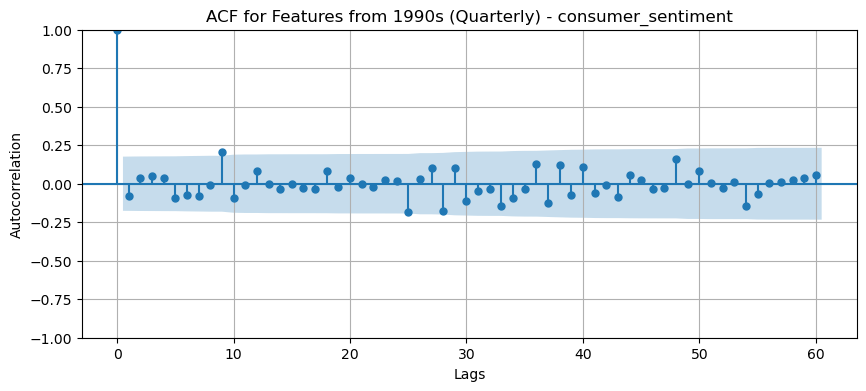

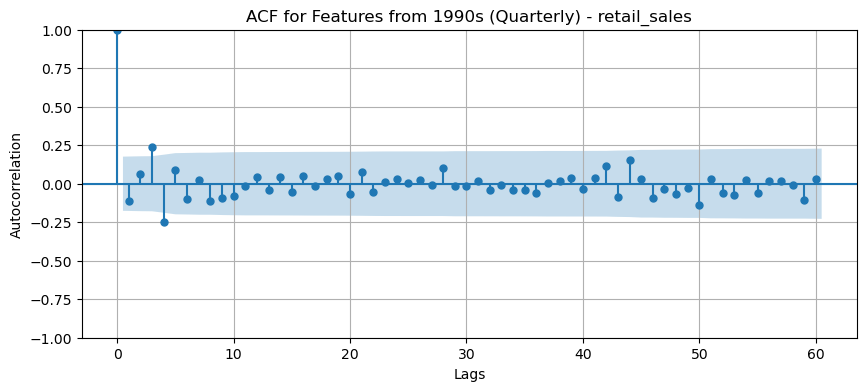

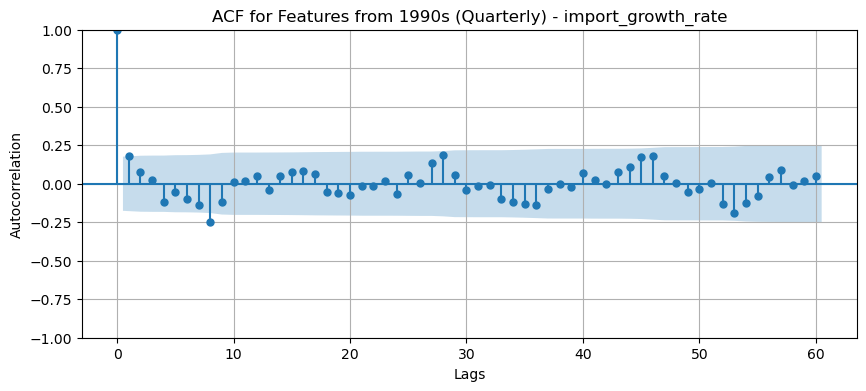

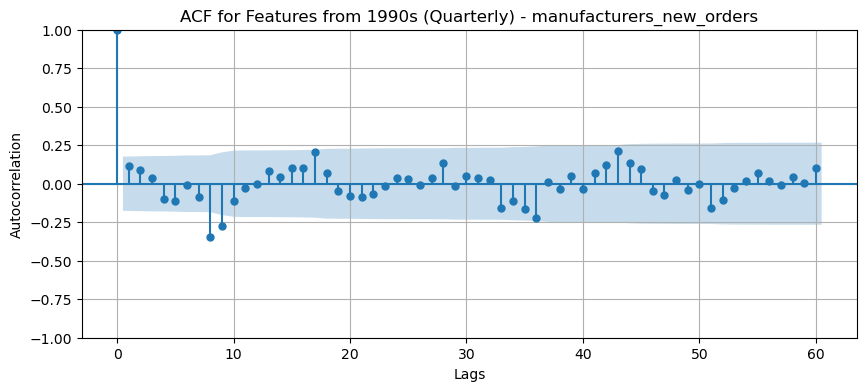

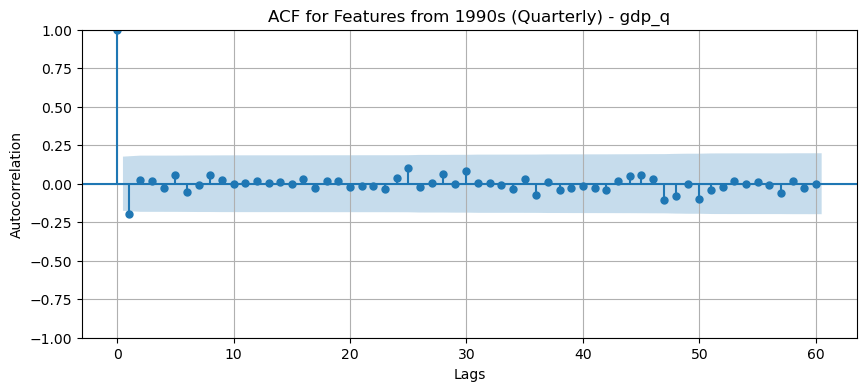

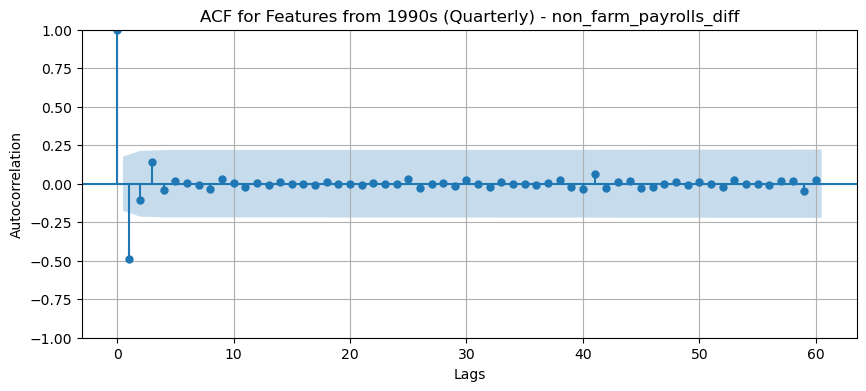

In [29]:
zm.plot_acf_for_features(features_1990_q_diff, 'Features from 1990s (Quarterly)', lags=60)

##### Observations

1. Seasonality

   There are no significant seasonalities within the correlogram of the target variable (gdp_q) and the correlograms of the features of the dataframe.

2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)

   Visually, I would say that most of the features exhibits dissimilar autocorrelation(AC) patterns with the target variables. I do note that OECD CLI exhibits the most similar AC patterns to gdp_q, followed by NFP.

3. Determining the lag factor (m) for modeling.

   I would say that a lag factor of 1 may be considered for modeling as it is the only significant spike in its correlogram.

Similar ACF patterns to gdp_q:
- oecd_cli
- NFP

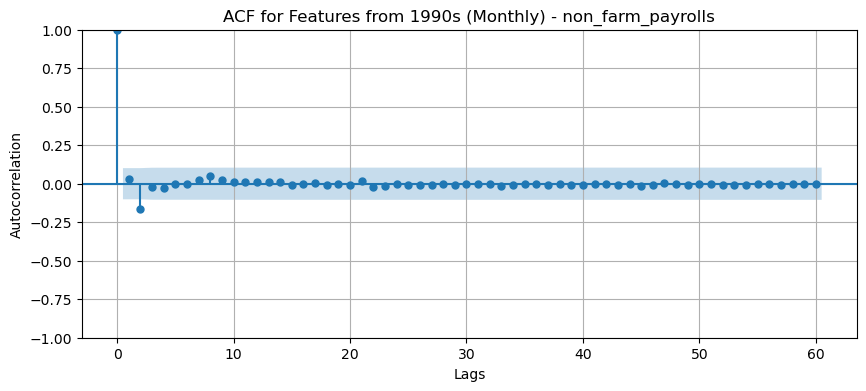

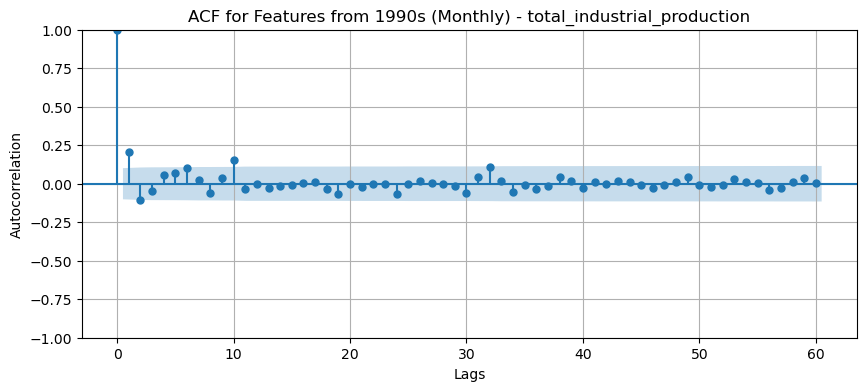

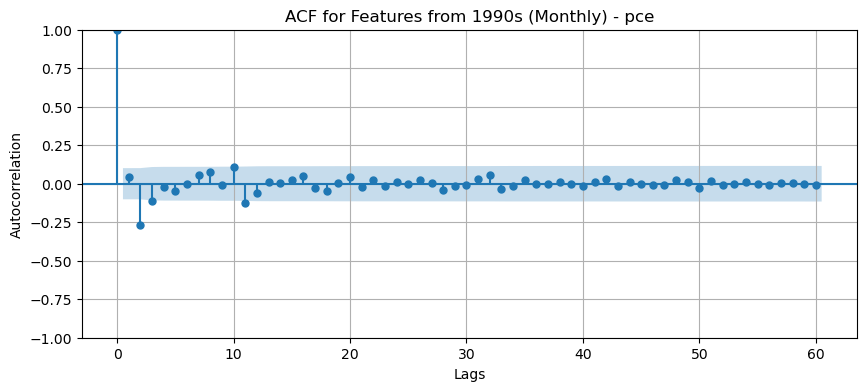

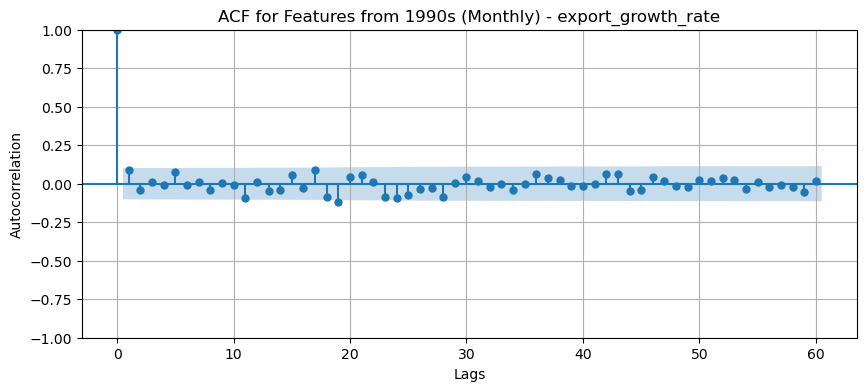

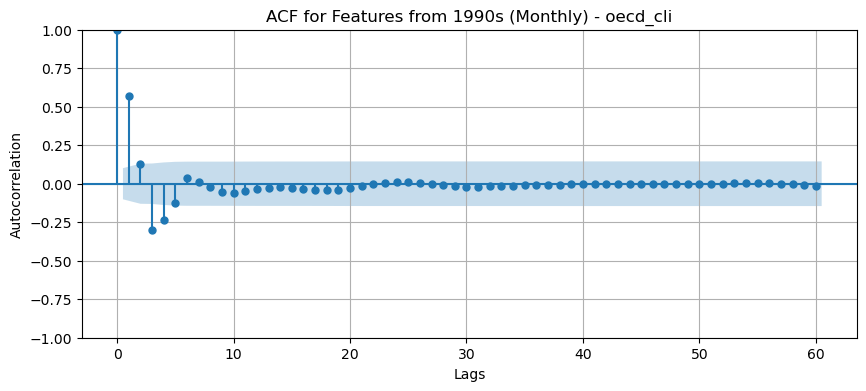

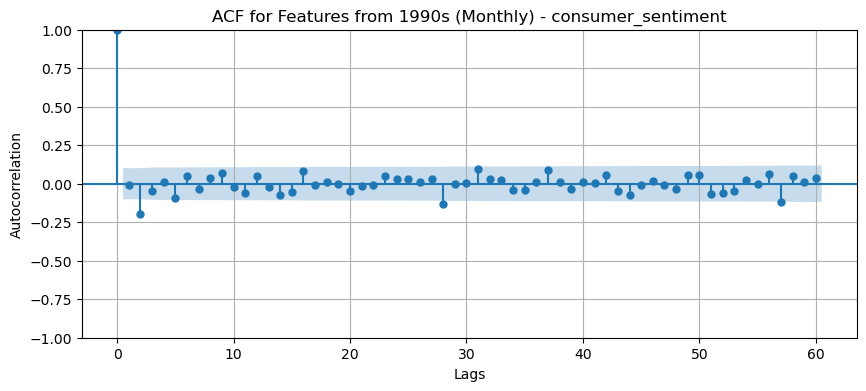

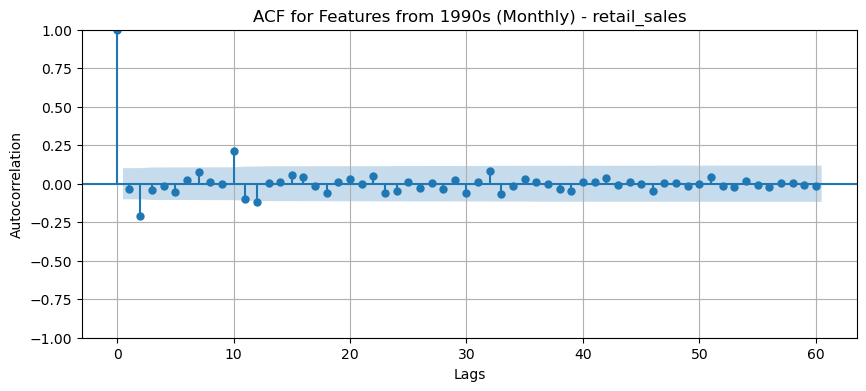

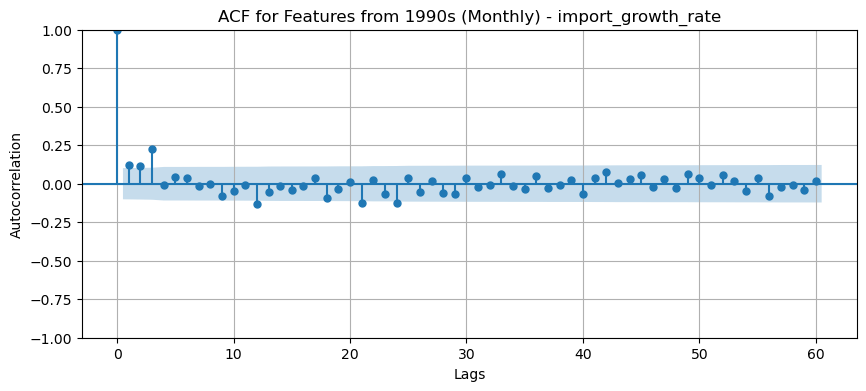

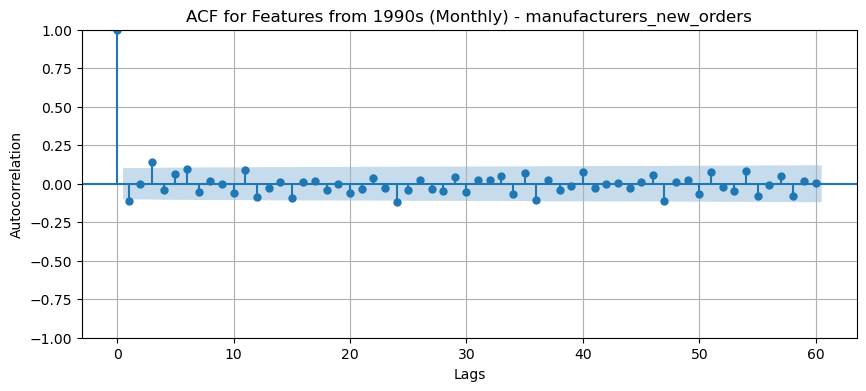

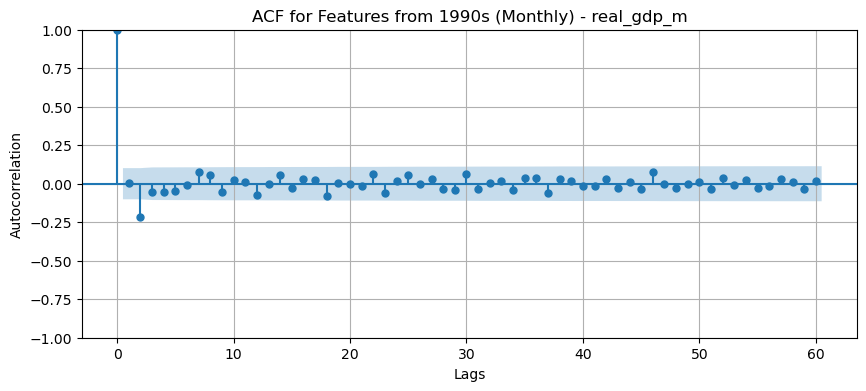

In [30]:
zm.plot_acf_for_features(features_1990_m, 'Features from 1990s (Monthly)', lags=60)

##### Observations

1. Seasonality

   There are no significant seasonalities within the correlogram of the target variable (gdp_m) and the correlograms of the features of the dataframe.

2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)

   Visually, I would say that most of the features exhibits dissimilar autocorrelation(AC) patterns with the target variables. I do note that NFP exhibits the most similar AC patterns to gdp_m.

3. Determining the lag factor (m) for modeling.

   I would say that a lag factor of 2 may be considered for modeling as it is the only significant spike in its correlogram.

Similar ACF patterns to gdp_m:
- NFP

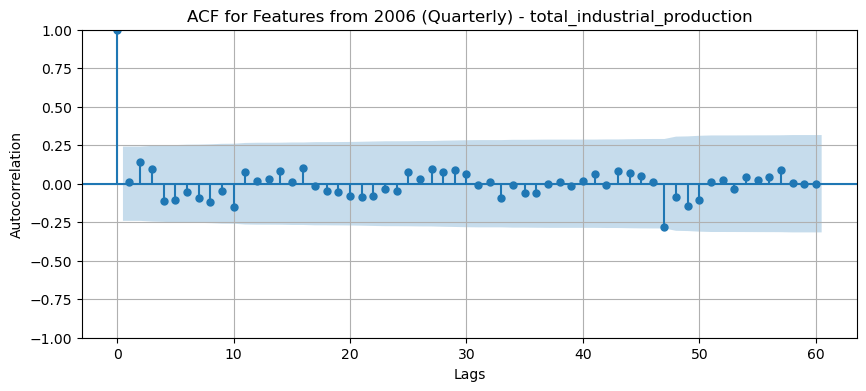

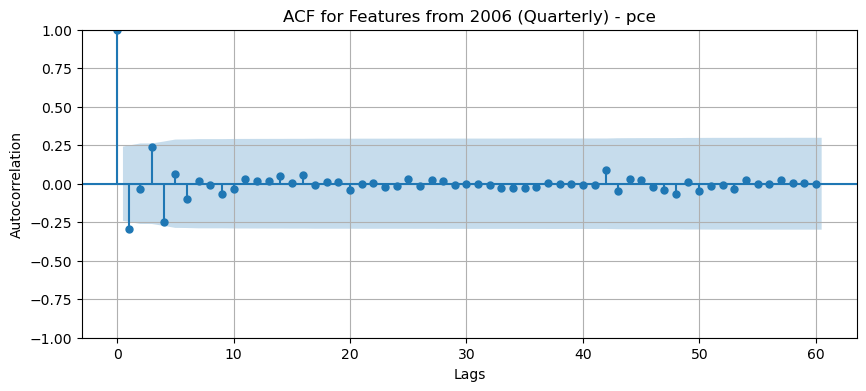

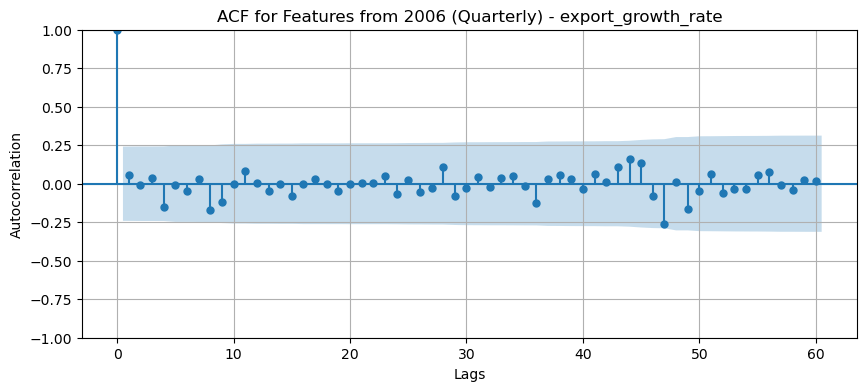

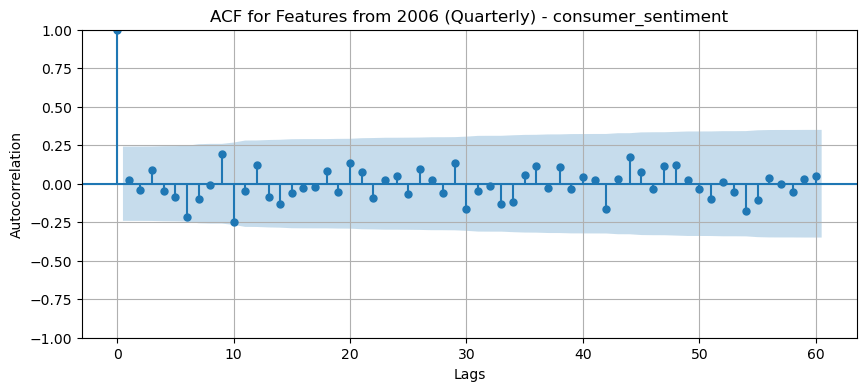

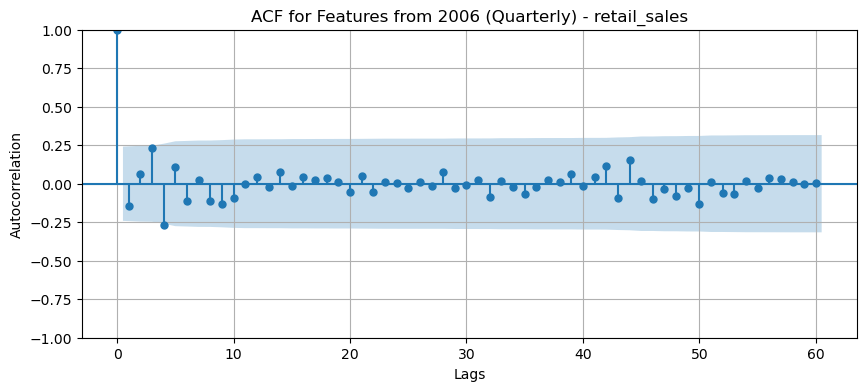

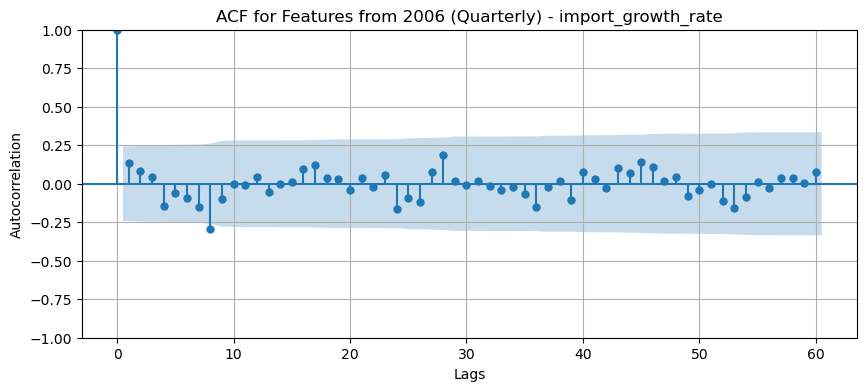

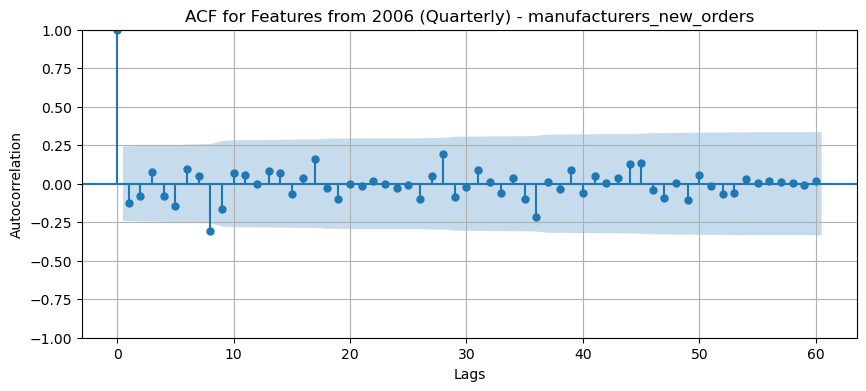

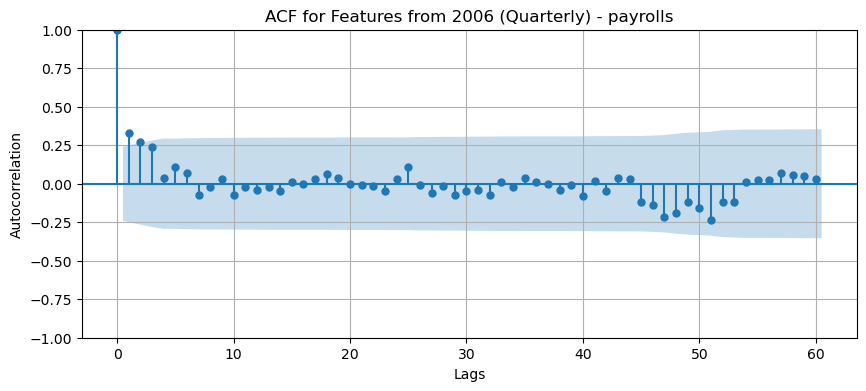

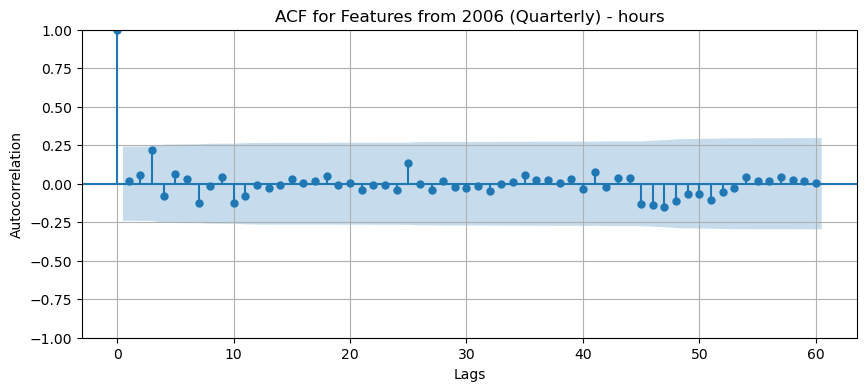

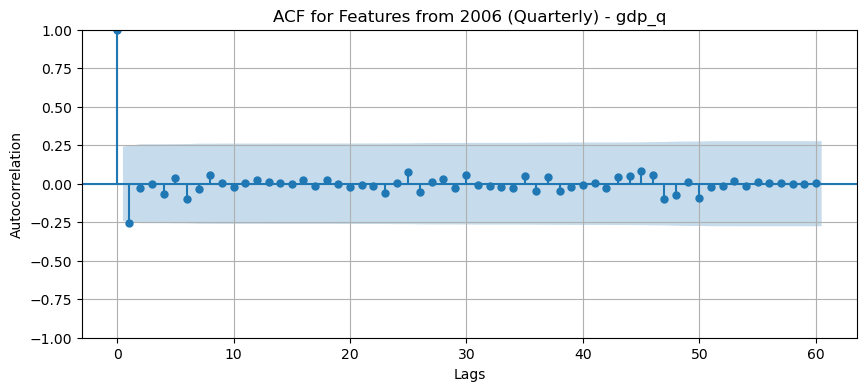

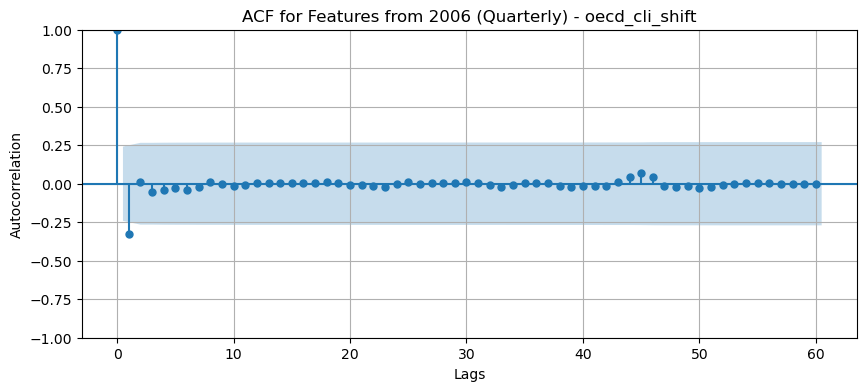

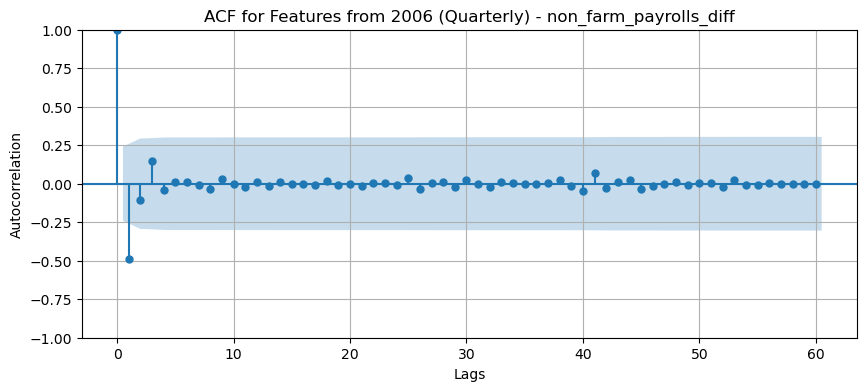

In [31]:
zm.plot_acf_for_features(all_features_2006_q_diff, 'Features from 2006 (Quarterly)', lags=60)

##### Observations

1. Seasonality

   There are no significant seasonalities within the correlogram of the target variable (gdp_q) and the correlograms of the features of the dataframe.

2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)

   Visually, I would say that most of the features exhibits dissimilar autocorrelation(AC) patterns with the target variables. I do note that OECD CLI exhibits the most similar AC patterns to gdp_q, followed by NFP.

3. Determining the lag factor (m) for modeling.

   I would say that a lag factor of 1 may be considered for modeling as it is the only significant spike in its correlogram.

Similar ACF patterns to gdp_q:
- oecd_cli_shift
- NFP

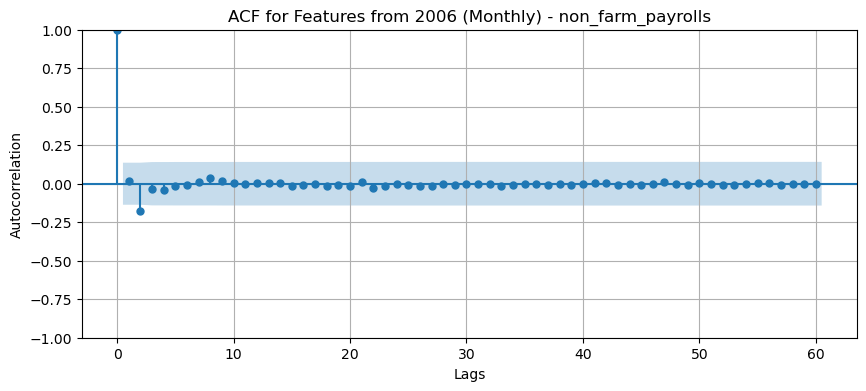

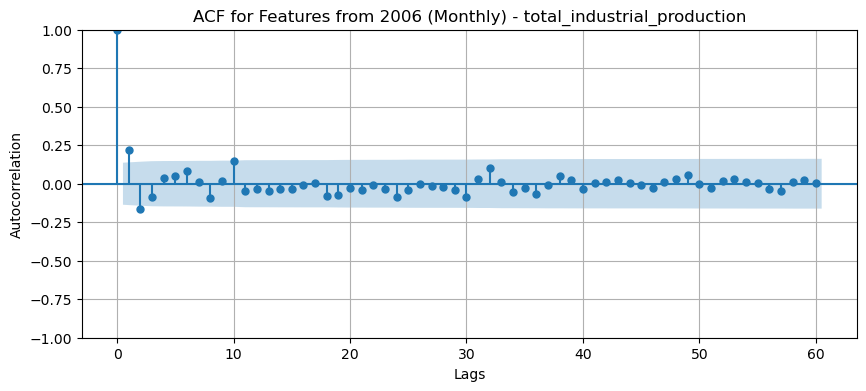

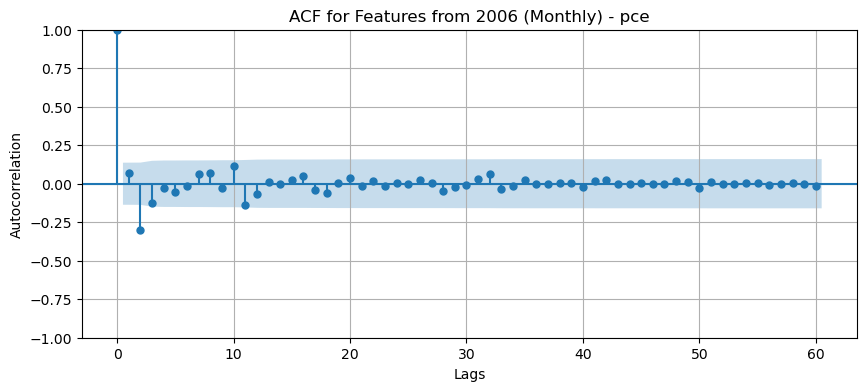

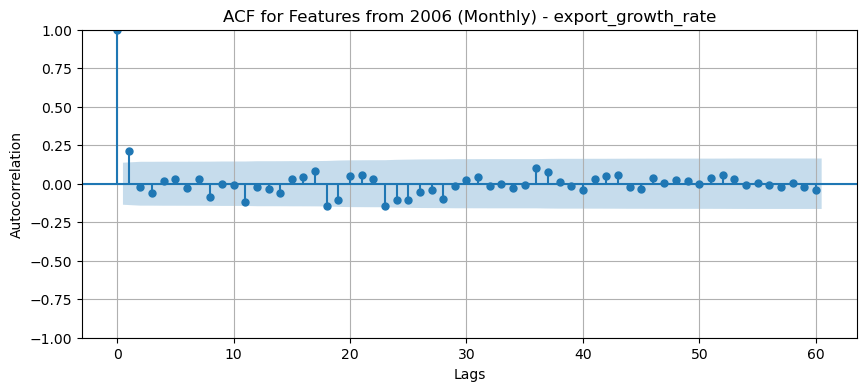

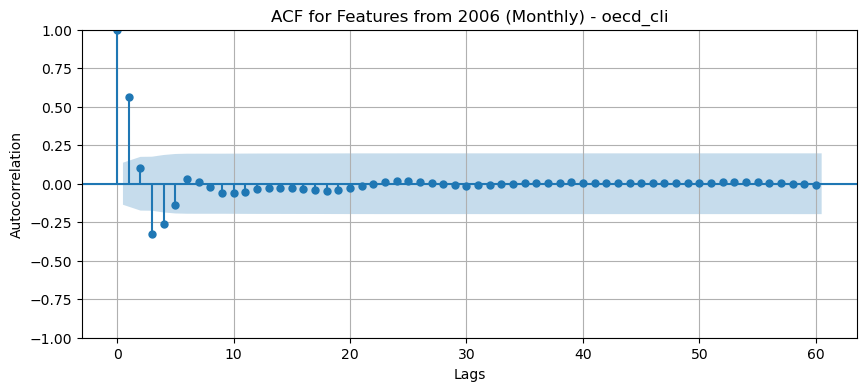

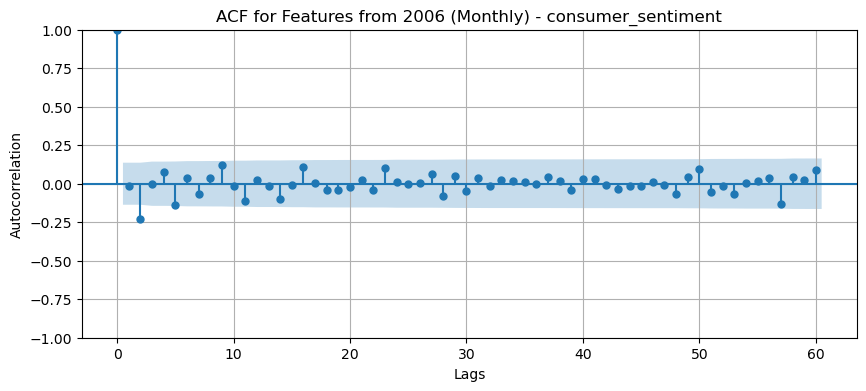

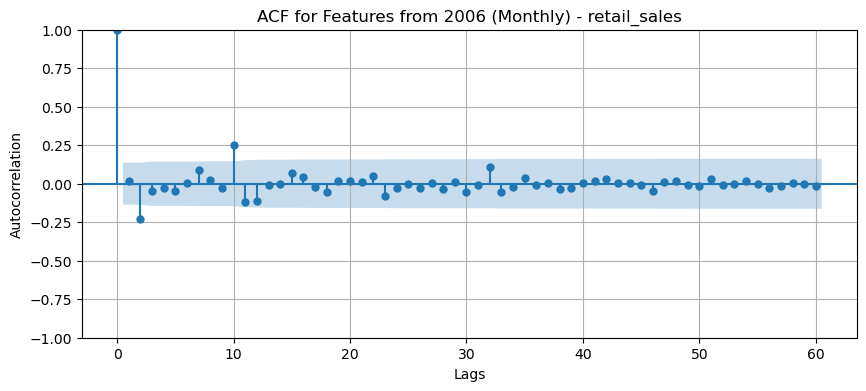

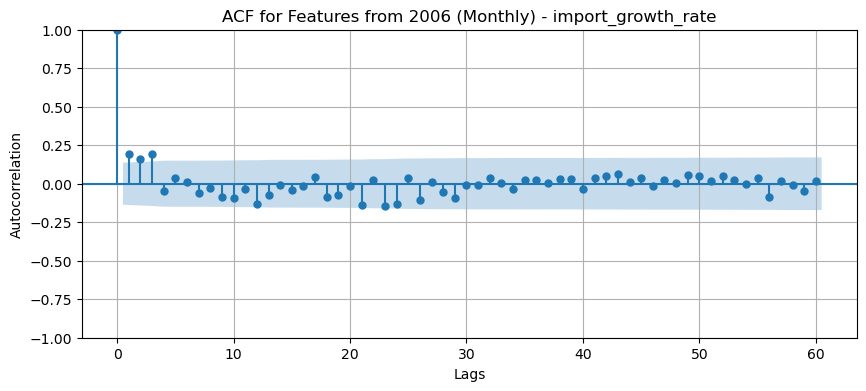

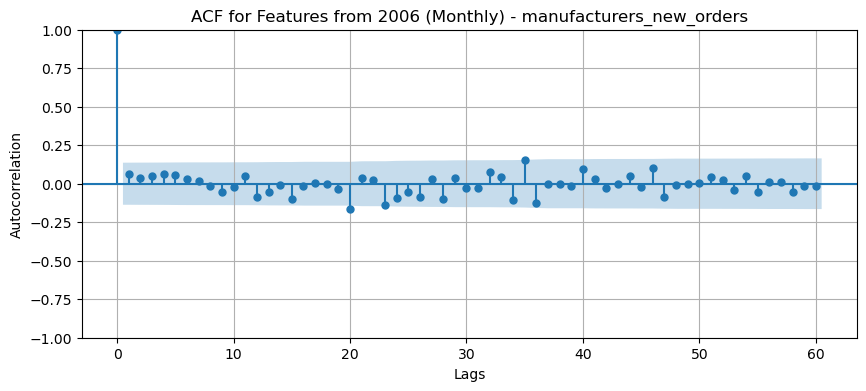

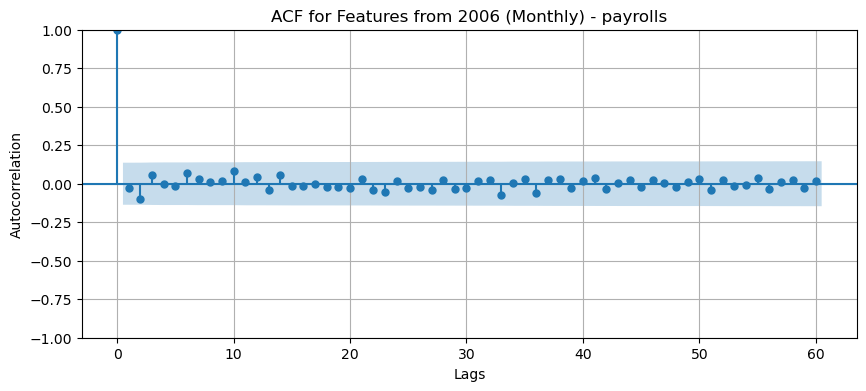

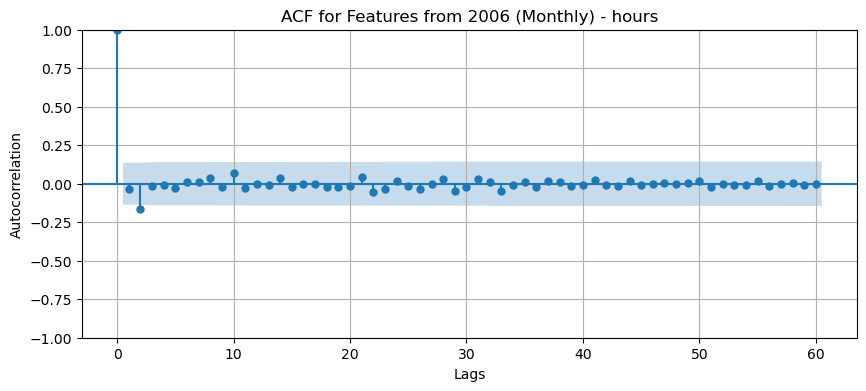

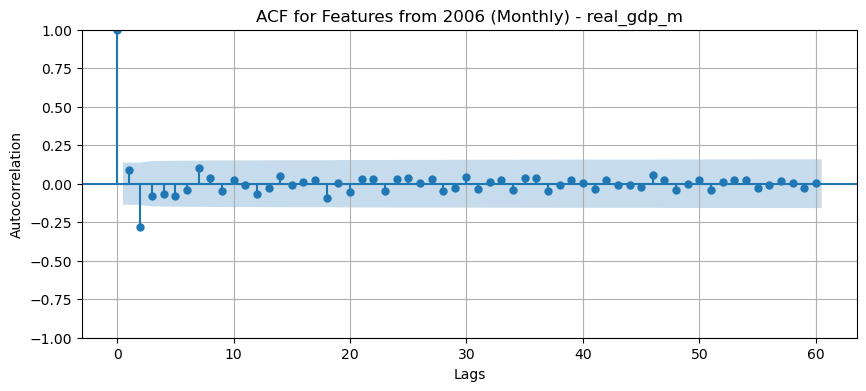

In [32]:
zm.plot_acf_for_features(all_features_2006_m, 'Features from 2006 (Monthly)', lags=60)

##### Observations

1. Seasonality

   There are no significant seasonalities within the correlogram of the target variable (gdp_m) and the correlograms of the features of the dataframe.

2. Similar autocorrelation patterns between features and target variable (For selection of potential Exogenous Variables)

   Visually, I would say that most of the features exhibits dissimilar autocorrelation(AC) patterns with the target variables.

3. Determining the lag factor (m) for modeling.

   I would say that a lag factor of 2 may be considered for modeling as it is the only significant spike in its correlogram.

Similar ACF patterns to gdp_m:
- total_industrial_production
- pce
- NFP

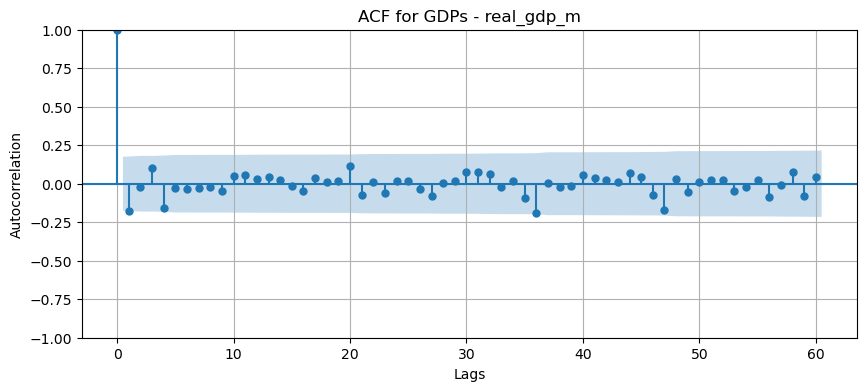

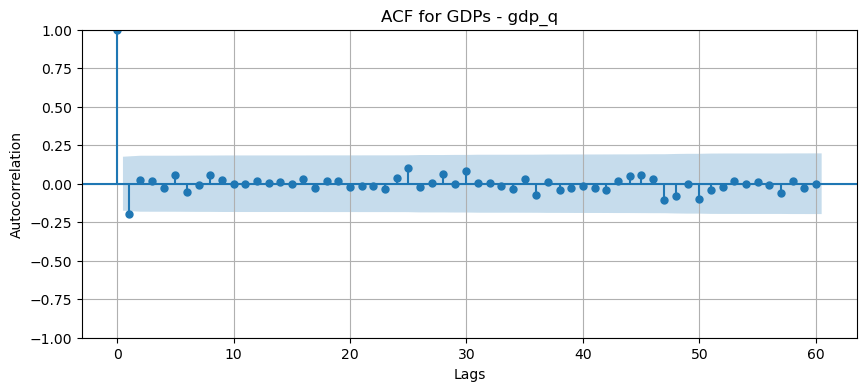

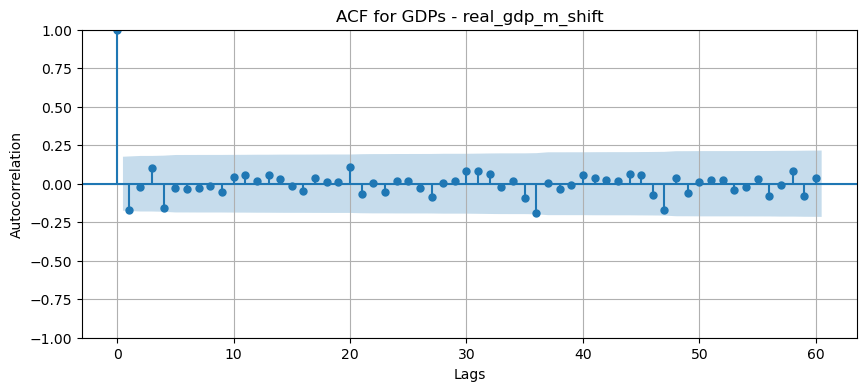

In [33]:
zm.plot_acf_for_features(gdp_m_q, 'GDPs', lags=60)

##### Observations

From the ACF plots we can observe that monthly (proxy) GDP and quarterly GDP has similar autocorrelation patterns despite some differences. This gives me confidence to use monthly (proxy) GDP as a proxy when predicting quarterly GDP on a monthly basis.

## Summary & Conclusions

The above observations, especially from the perspective of line plots and ACF plots might prove useful when considering exogenous variables when carrying out time series modelling later on and I would need to refer back to these observations if I am looking to explore ways to improve model metrics (MAPE) by way of selecting only the most similar exogenous variables from an auto-correlation and time series perspective.

# Exporting

In [34]:
# Exporting all dataframes of interest as pickle files
features_1960_q.to_pickle('../assets/features_1960_q.pkl')
features_1990_q_diff.to_pickle('../assets/features_1990_q_diff.pkl')
features_1990_m.to_pickle('../assets/features_1990_m.pkl')
all_features_2006_q_diff.to_pickle('../assets/all_features_2006_q_diff.pkl')
all_features_2006_m.to_pickle('../assets/all_features_2006_m.pkl')
gdp_m_q_uns.to_pickle('../assets/gdp_m_q_uns.pkl')

##### Summary of dataframes of interest:

1. features_1960_q
2. features_1990_q_diff
3. features_1990_m
4. all_features_2006_q_diff
5. all_features_2006_m

# End of Notebook

Please [click here](03_Modelling.ipynb) to proceed to the next notebook.

Feel free to click on the following notebooks to 'fast forward' to other sections of this project.

|Notebook Title|Description|
|---|---|
|[Introduction & Data Cleaning](01_Intro_Data_Cleaning.ipynb)|This notebook contains the introduction of the project, background motivation, problem statement and the inspection and cleaning of data.|
|[EDA](02_EDA.ipynb)|This notebook contains details on Exploratory Data Analysis.|
|[Modelling](03_Modelling.ipynb)|This notebook contains details on Modelling the data from a time series perspective.|
|[Modelling 2](04_Modelling2.ipynb)|This notebook contains details on time series Modelling with ARIMA, SARIMA and SARIMAX.|
|[Evaluation & Conclusion](05_Eval_Concl.ipynb)|This notebook contains details on model selection, evaluation and conclusion to the project|